# Import data

In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    DATA_PATH = ''

# If working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
pip install category_encoders

In [ ]:
# Import statements
import category_encoders as ce

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(DATA_PATH + 'log_data_and_log_text_10k.csv')

In [ ]:
df_100 = pd.read_csv(DATA_PATH + 'log_data_and_log_text_100k.csv')

In [ ]:
# This is what our data looks like upon import
df.head()

,17550413,2020-10-18 04:28:14.113,PriceCalcWs,3,135,SOAP request processed,0x30343A32383A31342E3135333A204665746368696E672064617461207769746820746F6B656E206F66202235346261633962652D336633622D343139382D393934622D6366303833643637376132662220616E6420726567696F6E206F662022444B31222E0D0A30343A32383A31342E3239333A2052657475726E696E6720393920726F77732E,"04:28:14.153: Fetching data with token of ""54bac9be-3f3b-4198-994b-cf083d677a2f"" and region of ""DK1"". 04:28:14.293: Returning 99 rows."
0,16631685,2020-08-19 00:36:09.640,PriceCalc,3,22942.0,PriceCalc finished in 8 seconds.,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."
1,17550414,2020-10-18 04:28:15.283,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A31352E3337313A204665746368696E67...,"04:28:15.371: Fetching data with token of ""54b..."
2,17550415,2020-10-18 04:28:17.410,PriceCalcWs,3,169.0,SOAP request processed,0x30343A32383A31372E3439363A2052657475726E696E...,04:28:17.496: Returning 99 rows. 04:28:17.496:...
3,17550416,2020-10-18 04:28:17.460,PriceCalcWs,3,NaN,SOAP request processed,NaN,NaN
4,17550420,2020-10-18 04:28:45.580,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A34352E3636383A204665746368696E67...,"04:28:45.668: Fetching data with token of ""54b..."


# Data cleaning #1

log_ID: Unik automatisk ID

log_Date: Tidspunkt for log entry

log_Application: Unik tekst per applikasjon

Hva er Log_AttLen?

lvl_ID: Referer til dbo.LogLevel

log_Text: Overskrift for log

log_Data: En VARBINARY(MAX) blob men inneholder uten unntak bare text og kan 

castes direkte til VARCHAR(MAX).

## Fix column headers

In [ ]:
# add column headers
df.columns = ['log_id',
              'log_date',
              'log_application',
              'lvl_id',
              'log_attlen',
              'log_text',
              'log_data',
              'text_data']

In [ ]:
df_100.columns = ['log_id',
              'log_date',
              'log_application',
              'lvl_id',
              'log_attlen',
              'log_text',
              'log_data',
              'text_data']

In [ ]:
df.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
0,16631685,2020-08-19 00:36:09.640,PriceCalc,3,22942.0,PriceCalc finished in 8 seconds.,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."
1,17550414,2020-10-18 04:28:15.283,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A31352E3337313A204665746368696E67...,"04:28:15.371: Fetching data with token of ""54b..."
2,17550415,2020-10-18 04:28:17.410,PriceCalcWs,3,169.0,SOAP request processed,0x30343A32383A31372E3439363A2052657475726E696E...,04:28:17.496: Returning 99 rows. 04:28:17.496:...
3,17550416,2020-10-18 04:28:17.460,PriceCalcWs,3,NaN,SOAP request processed,NaN,NaN
4,17550420,2020-10-18 04:28:45.580,PriceCalcWs,3,135.0,SOAP request processed,0x30343A32383A34352E3636383A204665746368696E67...,"04:28:45.668: Fetching data with token of ""54b..."


## Converting log_date to datetime & sorting by log_date

In [ ]:
df['log_date'] = pd.to_datetime(df['log_date'])
df_100['log_date'] = pd.to_datetime(df_100['log_date'])

In [ ]:
df = df.sort_values(by='log_date',ascending=True)
df_100 = df_100.sort_values(by='log_date',ascending=True)

# General Exploration

In [ ]:
df.shape

(9999, 8)

In [ ]:
df_100.shape

(99999, 8)

In [ ]:
# Starts 1st of August
df_100.head(2)

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
88847,16394750,2020-08-01 00:00:04.820,WAPI Curve Import,3,763.0,Checking subscriptions 01.08.2020 00:00:01,0x20202020202020202020202020202020202020202020...,...
83076,16394757,2020-08-01 00:01:27.037,Transfer To Nimbus,3,837.0,DG10/DAFRONTEND processed changes: Import,0x0D0A30303A30303A35323A2050726F63657373696E67...,00:00:52: Processing Curve/Actual 00:00:53: P...


In [ ]:
# Ends 10th of November
df_100.tail(2)

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
48211,18282066,2020-11-10 09:31:46.460,PriceCalcWs,3,135.0,SOAP request processed,0x30393A33313A34362E3334303A204665746368696E67...,"09:31:46.340: Fetching data with token of ""54b..."
56241,18282067,2020-11-10 09:32:11.220,WAPI Curve Import,3,1788.0,Checking subscriptions 10.11.2020 09:31:51,0x393A33313A35312E343534333430363A20436865636B...,"9:31:51.4543406: Checking subscription: 20720,..."


In [ ]:
df.describe()

,log_id,lvl_id,log_attlen
count,9.999000e+03,9999.000000,7790.000000
mean,1.748483e+07,2.990599,1412.355071
std,2.320866e+05,0.133098,6840.063512
min,1.639552e+07,1.000000,0.000000
25%,1.738189e+07,3.000000,135.000000
50%,1.763927e+07,3.000000,135.000000
75%,1.764514e+07,3.000000,135.000000
max,1.809544e+07,3.000000,245231.000000


In [ ]:
df.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
count,9.999000e+03,9999,9999,9999.000000,7790.000000,9997,7790,7789
unique,NaN,9992,32,NaN,NaN,1029,7362,7361
top,NaN,2020-10-17 23:45:49.173000,PriceCalcWs,NaN,NaN,SOAP request processed,0x3C68746D6C3E3C686561643E3C6C696E6B2072656C3D...,"<html><head><link rel=""StyleSheet"" href=""Style..."
freq,NaN,3,7579,NaN,NaN,7352,25,25
first,NaN,2020-08-01 01:45:52.437000,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-11-04 18:05:45.457000,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.748483e+07,NaN,NaN,2.990599,1412.355071,NaN,NaN,NaN
std,2.320866e+05,NaN,NaN,0.133098,6840.063512,NaN,NaN,NaN
min,1.639552e+07,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,1.738189e+07,NaN,NaN,3.000000,135.000000,NaN,NaN,NaN


In [ ]:
df.dtypes

log_id                      int64
log_date           datetime64[ns]
log_application            object
lvl_id                      int64
log_attlen                float64
log_text                   object
log_data                   object
text_data                  object
dtype: object

In [ ]:
# DF contains many more applications than described in dbo.application
df['log_application'].value_counts()

PriceCalcWs                    7579
WAPI Curve Import               485
iRisk Data Services             438
RockyII                         434
Transfer To Nimbus              294
Wind Power Import               221
ComTSExport                      93
PriceCalc                        85
Fin BO to Powel                  81
Nord Pool Trades                 68
Nord Pool Market Data            35
Nasdaq Fix                       32
Nasdaq FDS Reader                27
SEB Currency Feed                26
Ftp Trigger Script               25
Brady Oracle Scripts             12
GreenCert                        12
TradeFetcher                     12
Nasdaq Data Import               11
MKInvoice                        11
MiFiR Reporting                   3
Nord Pool Prices                  3
FinBoReporting                    3
Nasdaq Span Import                1
NordPool Settlement Fetcher       1
MK Customer Forum                 1
Nasdaq Split                      1
Nimbus Day Ahead Trades     

In [ ]:
# How many applications are there in the dataframe?
len(df_100['log_application'].value_counts())

42

In [ ]:
# How many log events of each application?
len(df_100['log_application'].value_counts())

42

In [ ]:
# Decently high cardinality
# Most text_data clusters around 135 -> probably due to majority of log being 
# PriceCalcWs calls
df['log_attlen'].value_counts()

135.0     5431
136.0      173
122.0      162
93.0       142
121.0      131
          ... 
1019.0       1
1212.0       1
2087.0       1
1265.0       1
675.0        1
Name: log_attlen, Length: 788, dtype: int64

In [ ]:
df['log_text'].value_counts()

SOAP request processed                                                                                                 7352
Request handled spGetiRiskData                                                                                          438
Running import from API to Powel                                                                                        221
REST request processed                                                                                                  221
Curve/Actual processed changes: Import                                                                                  110
                                                                                                                       ... 
Moving UMEA_ENERGY-2020.10.17_16_45-2020.10.17_19_45.gs2 to \\mkrare3120\PowelFileExch\Powel\IccData\import\GS2\New       1
Checking subscriptions 17.10.2020 20:02:37                                                                                1
Checking

In [ ]:
df['lvl_id'].value_counts()

3    9947
1      42
2      10
Name: lvl_id, dtype: int64

In [ ]:
# How many errors are there?
df_100['lvl_id'].value_counts()

3    99599
2      295
1      101
0        4
Name: lvl_id, dtype: int64

### Looking at errors in lvl_id

In [ ]:
# Almost all errors are in Transfer To Nimbus, over the course of two days
# Makes me believe that this dataset contains a lot of resolved errors
# And that looking at identified errors in the dataset is uninteresting.
df[df['lvl_id'] == 1]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
1942,16580522,2020-08-15 12:00:57.440,Transfer To Nimbus,1,745.0,HydroGrid Bids processed changes:,0x0D0A31323A30303A35373A2050726F63657373696E67...,12:00:57: Processing Curve/Actual 12:00:57: P...
1943,16580523,2020-08-15 12:00:57.517,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30303A35373A2050726F63657373696E67...,12:00:57: Processing HydroGrid Plans 12:00:57...
1945,16580533,2020-08-15 12:01:32.060,Transfer To Nimbus,1,1328.0,HydroGrid Bids processed changes:,0x0D0A31323A30313A32383A2050726F63657373696E67...,12:01:28: Processing ECS 12:01:28: Executing ...
1946,16580535,2020-08-15 12:01:32.153,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30313A33323A2050726F63657373696E67...,12:01:32: Processing HydroGrid Plans 12:01:32...
1947,16580536,2020-08-15 12:02:03.910,Transfer To Nimbus,1,1426.0,HydroGrid Bids processed changes:,0x0D0A31323A30313A33323A204C6F6767696E67206F66...,12:01:32: Logging off Powel 12:02:02: Logged ...
2156,16580600,2020-08-15 12:07:06.377,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30373A30363A2050726F63657373696E67...,12:07:06: Processing HydroGrid Plans 12:07:06...
2158,16580605,2020-08-15 12:07:38.693,Transfer To Nimbus,1,1328.0,HydroGrid Bids processed changes:,0x0D0A31323A30373A33373A2050726F63657373696E67...,12:07:37: Processing ECS 12:07:37: Executing ...
2159,16580606,2020-08-15 12:07:38.740,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30373A33383A2050726F63657373696E67...,12:07:38: Processing HydroGrid Plans 12:07:38...
2160,16580607,2020-08-15 12:08:12.687,Transfer To Nimbus,1,1426.0,HydroGrid Bids processed changes:,0x0D0A31323A30373A33383A204C6F6767696E67206F66...,12:07:38: Logging off Powel 12:08:09: Logged ...
2161,16580611,2020-08-15 12:08:12.733,Transfer To Nimbus,1,676.0,HydroGrid Plans processed changes:,0x0D0A31323A30383A31323A2050726F63657373696E67...,12:08:12: Processing HydroGrid Plans 12:08:12...


In [ ]:
# 2 = Warning
df[df['lvl_id'] == 2]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
280,16768634,2020-08-30 06:46:29.503,WAPI Curve Import,2,1412.0,Checking subscriptions 30.08.2020 06:46:28,0x20202020202020202020202020202020202020202020...,...
283,16768640,2020-08-30 06:48:45.937,WAPI Curve Import,2,6060.0,Checking subscriptions 30.08.2020 06:47:29,0x20202020202020202020202020202020202020202020...,...
44,16845325,2020-09-05 10:51:06.737,WAPI Curve Import,2,2299.0,Checking subscriptions 05.09.2020 10:50:19,0x20202020202020202020202020202020202020202020...,...
45,16845334,2020-09-05 10:52:11.100,WAPI Curve Import,2,1887.0,Checking subscriptions 05.09.2020 10:51:19,0x20202020202020202020202020202020202020202020...,...
46,16845342,2020-09-05 10:53:30.980,WAPI Curve Import,2,2632.0,Checking subscriptions 05.09.2020 10:52:20,0x20202020202020202020202020202020202020202020...,...
47,16845349,2020-09-05 10:54:38.790,WAPI Curve Import,2,3936.0,Checking subscriptions 05.09.2020 10:53:30,0x436865636B696E6720737562736372697074696F6E3A...,"Checking subscription: 20720, last updated: 04..."
1893,16962469,2020-09-15 09:48:21.820,WAPI Curve Import,2,2544.0,Checking subscriptions 15.09.2020 09:46:30,0x436865636B696E6720737562736372697074696F6E3A...,"Checking subscription: 20720, last updated: 14..."
8161,16963897,2020-09-15 11:45:47.490,WAPI Curve Import,2,2417.0,Checking subscriptions 15.09.2020 11:43:55,0x436865636B696E6720737562736372697074696F6E3A...,"Checking subscription: 20720, last updated: 14..."
5016,17545437,2020-10-17 23:32:15.347,MKInvoice,2,939.0,Brady Import Init,0x556E61626C6520746F20636F6E6E65637420746F2042...,Unable to connect to Brady Oracle database. Er...
9799,17648099,2020-10-21 22:43:15.130,MKInvoice,2,939.0,Brady Import Init,0x556E61626C6520746F20636F6E6E65637420746F2042...,Unable to connect to Brady Oracle database. Er...


In [ ]:
# Critical Errors
# Intraday, TradeFetcher
# Timespan: 4 minutes
df_100[df_100['lvl_id'] == 0]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
31209,17407986,2020-10-12 13:15:20.703,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...
30175,17408024,2020-10-12 13:17:20.607,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...
28315,17408033,2020-10-12 13:18:20.613,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...
31448,17408044,2020-10-12 13:19:20.590,TradeFetcher,0,612.0,Unexpected exception,0x5452443032363B414D503B31305944452D5257454E45...,TRD026;AMP;10YDE-RWENET---I;S;Intraday_Hour_Po...


## What is Log_AttLen?

In [ ]:
# Checking length of a log_data instance
len('0x30343A32383A31372E3439363A2052657475726E696E6720393920726F77732E0D0A30343A32383A31372E3439363A204665746368696E672064617461207769746820746F6B656E206F66202235346261633962652D336633622D343139382D393934622D6366303833643637376132662220616E6420726567696F6E206F662022444B31222E0D0A30343A32383A31372E3539303A2052657475726E696E6720393920726F77732E')

340

In [ ]:
### Log_AttLen is the length of text_data ###
len('04:28:17.496: Returning 99 rows.  04:28:17.496: Fetching data with token of "54bac9be-3f3b-4198-994b-cf083d677a2f" and region of "DK1".  04:28:17.590: Returning 99 rows.')

169

# Data cleaning #2

## Looking at NULL values

In [ ]:
# lvl_id, log_data / text_data NaN values correlate
# Also comprise 1/5th of the dataset
# Consider removing
df.isnull().sum().sort_values()

log_id                0
log_date              0
log_application       0
lvl_id                0
log_text              2
log_attlen         2209
log_data           2209
text_data          2210
dtype: int64

In [ ]:
# Check what applications are associated with NULL values
df_nulls = df[df.isnull().any(axis=1)]
df_nulls['log_application'].value_counts()

PriceCalcWs           2180
Ftp Trigger Script      25
FinBoReporting           2
Fin BO to Powel          1
ComTSExport              1
MiFiR Reporting          1
Excel                    1
MKInvoice                1
Name: log_application, dtype: int64

In [ ]:
df_100.isnull().sum().sort_values()

log_id                 0
log_date               0
log_application        0
lvl_id                 0
log_text               9
log_attlen         26921
log_data           26921
text_data          26927
dtype: int64

In [ ]:
# Essentially all NULL values are comprised in PriceCalcWs
# Roughly 1/3rd of PriceCalcWs returns NULL
df_100_nulls = df_100[df_100.isnull().any(axis=1)]
df_100_nulls['log_application'].value_counts()

PriceCalcWs           26642
Ftp Trigger Script      248
FinBoReporting           12
ComTSExport               9
Excel                     6
WAPI Curve Import         5
Nord Pool Trades          4
MKInvoice                 4
Fin BO to Powel           2
Nasdaq Fix                1
Nasdaq Data Import        1
MiFiR Reporting           1
TradeFetcher              1
Name: log_application, dtype: int64

# Exploring text_data per Application

## Nimbus

In [ ]:
# Nimbus:
# Fjellet_ProdEnergi = kraftstasjon / klient / portofølje
# Flittig_ProdEnergi
# Powel
# HydroGrid Bids / Plans
# Stored procedure: spGetProduction
# Trade?
# Får ikke tilgang til nyttig informasjon her.

print( " 02:54:07: Processing Vitec  02:54:10: Processing WS/Emps  02:54:10: Logging off Powel  02:54:40: Logged on Powel TSS  02:54:40: Processing Csv  02:54:40: Processing Curve/Actual  02:54:40: Processing Curve/Forecast  02:54:40: Processing ECS  02:54:40: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40:   ImportData found 4 data points  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:54:41: Processing HydroGrid Bids  02:54:41: Processing HydroGrid Plans  02:54:41: Processing Sca  02:54:41: Processing Vitec  02:54:41: Processing WS/Emps  02:54:41: Logging off Powel  02:55:11: Logged on Powel TSS  02:55:11: Processing Csv  02:55:11: Processing Curve/Actual  02:55:12: Processing Curve/Forecast  02:55:12: Processing ECS  02:55:12: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:12: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:12:   ImportData found 4 data points  02:55:12:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:55:12:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:55:12: Processing HydroGrid Bids  02:55:12: Processing HydroGrid Plans  02:55:12: Processing Sca  02:55:12: Processing Vitec  02:55:15: Processing WS/Emps  02:55:15: Logging off Powel  02:55:45: Logged on Powel TSS  02:55:45: Processing Csv  02:55:46: Processing Curve/Actual  02:55:46: Processing Curve/Forecast  02:55:46: Processing ECS  02:55:46: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:46: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:55:46:   ImportData found 4 data points  02:55:46:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:55:46:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:55:46: Processing HydroGrid Bids  02:55:46: Processing HydroGrid Plans  02:55:46: Processing Sca  02:55:46: Processing Vitec  02:55:47: Processing WS/Emps  02:55:47: Logging off Powel  02:56:17: Logged on Powel TSS  02:56:17: Processing Csv  02:56:17: Processing Curve/Actual  02:56:17: Processing Curve/Forecast  02:56:17: Processing ECS  02:56:17: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:17: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:17:   ImportData found 4 data points  02:56:17:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:56:17:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:56:18: Processing HydroGrid Bids  02:56:18: Processing HydroGrid Plans  02:56:18: Processing Sca  02:56:18: Processing Vitec  02:56:20: Processing WS/Emps  02:56:20: Logging off Powel  02:56:51: Logged on Powel TSS  02:56:51: Processing Csv  02:56:51: Processing Curve/Actual  02:56:51: Processing Curve/Forecast  02:56:51: Processing ECS  02:56:51: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:51: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:56:51:   ImportData found 4 data points  02:56:51:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:56:51:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:56:51: /MKNO/LøvFo/PRD/PR.CH-P0856-Flittig. Powel TimeSeries: /MKNO/LøvFo/PRD/PR.CH-P0856-Flittig with resolution 3600    No intraday changes found.  02:56:51: /MKNO/LøvFo/PRD/PR.CH-P2359-Fjellet. Powel TimeSeries: /MKNO/LøvFo/PRD/PR.CH-P2359-Fjellet with resolution 3600    No intraday changes found.  02:56:52: Processing HydroGrid Bids  02:56:52: Processing HydroGrid Plans  02:56:52: Processing Sca  02:56:52: Processing Vitec  02:56:52: Processing WS/Emps  02:56:52: Logging off Powel  02:57:23: Logged on Powel TSS  02:57:23: Processing Csv  02:57:23: Processing Curve/Actual  02:57:23: Processing Curve/Forecast  02:57:23: Processing ECS  02:57:23: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:23: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:23:   ImportData found 4 data points  02:57:23:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:57:23:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:57:24: Processing HydroGrid Bids  02:57:24: Processing HydroGrid Plans  02:57:24: Processing Sca  02:57:24: Processing Vitec  02:57:26: Processing WS/Emps  02:57:26: Logging off Powel  02:57:57: Logged on Powel TSS  02:57:57: Processing Csv  02:57:57: Processing Curve/Actual  02:57:57: Processing Curve/Forecast  02:57:57: Processing ECS  02:57:57: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:57: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:57:57:   ImportData found 4 data points  02:57:57:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:57:57:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:57:57: Processing HydroGrid Bids  02:57:57: Processing HydroGrid Plans  02:57:58: Processing Sca  02:57:58: Processing Vitec  02:57:58: Processing WS/Emps  02:57:58: Logging off Powel  02:58:28: Logged on Powel TSS  02:58:28: Processing Csv  02:58:28: Processing Curve/Actual  02:58:29: Processing Curve/Forecast  02:58:29: Processing ECS  02:58:29: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:58:29: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:58:29:   ImportData found 4 data points  02:58:29:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:58:29:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:58:29: Processing HydroGrid Bids  02:58:29: Processing HydroGrid Plans  02:58:30: Processing Sca  02:58:30: Processing Vitec  02:58:32: Processing WS/Emps  02:58:32: Logging off Powel  02:59:03: Logged on Powel TSS  02:59:03: Processing Csv  02:59:03: Processing Curve/Actual  02:59:03: Processing Curve/Forecast  02:59:03: Processing ECS  02:59:03: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:03: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:03:   ImportData found 4 data points  02:59:03:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:59:03:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:59:03: Processing HydroGrid Bids  02:59:03: Processing HydroGrid Plans  02:59:03: Processing Sca  02:59:03: Processing Vitec  02:59:04: Processing WS/Emps  02:59:04: Logging off Powel  02:59:34: Logged on Powel TSS  02:59:34: Processing Csv  02:59:34: Processing Curve/Actual  02:59:35: Processing Curve/Forecast  02:59:35: Processing ECS  02:59:35: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:35: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:59:35:   ImportData found 4 data points  02:59:35:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:59:35:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:59:35: Processing HydroGrid Bids  02:59:35: Processing HydroGrid Plans  02:59:35: Processing Sca  02:59:35: Processing Vitec  02:59:38: Processing WS/Emps  02:59:38: Logging off Powel  03:00:08: Logged on Powel TSS  03:00:08: Processing Csv  03:00:08: Processing Curve/Actual  03:00:09:   ImportData found 1785 data points  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK1-DKK for Destination=29534    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK1_EUR for Destination=29535    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK2_EUR for Destination=29536    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/DK/CNS/IMBALANCE_PRICE_DK2-DKK for Destination=29537    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO1-NOK for Destination=29538    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO2-NOK for Destination=29539    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO3-NOK for Destination=29540    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO4-NOK for Destination=29541    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO5-NOK for Destination=29542    Added time series with 25 data points.  03:00:09:   Found time series /MKASA/NO/CNS/IMBALANCE_PRICE_NO5-EUR for Destination=29543")

 02:54:07: Processing Vitec  02:54:10: Processing WS/Emps  02:54:10: Logging off Powel  02:54:40: Logged on Powel TSS  02:54:40: Processing Csv  02:54:40: Processing Curve/Actual  02:54:40: Processing Curve/Forecast  02:54:40: Processing ECS  02:54:40: Executing stored procedure: spGetProduction @reference='Fjellet_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40: Executing stored procedure: spGetProduction @reference='Flittig_ProdEnergi', @date='2020-10-28', @resolution=3600  02:54:40:   ImportData found 4 data points  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P2359-Fjellet for Destination=3581  02:54:40:   Found time series /MKNO/LøvFo/PRD/PR.MTR-P0856-Flittig for Destination=3586  02:54:41: Processing HydroGrid Bids  02:54:41: Processing HydroGrid Plans  02:54:41: Processing Sca  02:54:41: Processing Vitec  02:54:41: Processing WS/Emps  02:54:41: Logging off Powel  02:55:11: Logged on Powel TSS  02:55:11: Processing Csv  02:55:11: Processing Curve/Actual  02:55

## PriceCalcWs

In [ ]:
# PriceCalcWs
# DK1 = Nord for Fyn
# Price Calculation for DK1 area @ 2:54. Returns 99 rows
# Etter hver PriceCalc request, så er det en NULL row 
## Ikke alltid! Men konsekvent når det skjer

# SOAP Request:
## Simple Object Access Protocol, PowerBI
## Messaging protocol: (XML) with price calculations?

# Tror ikke dette er noe å ta tak i.

print('02:54:16.585: Fetching data with token of "54bac9be-3f3b-4198-994b-cf083d677a2f" and region of "DK1".  02:54:16.663: Returning 99 rows.')

02:54:16.585: Fetching data with token of "54bac9be-3f3b-4198-994b-cf083d677a2f" and region of "DK1".  02:54:16.663: Returning 99 rows.


## Wind Power Import

In [ ]:
# Wind Power Import
# Production data fra vindparker i sverige
# Ny data per 10 min? Se nærmere på denne applikasjonen
# Example: https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91
# "Saving data to Powel" - Split her
# Trim tallene til .XXX eller .XX før du kjører modell
# Dette er brukbart. Går ofte i sesonger. Ta produksjonsdata over tid.
## Bruk i prediksjonsmodell
print("Fetching data from Api.  Fetching data for Bleikevare @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91  Fetched data successfully.  Fetching data for Brahehus @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/1852ac84002c423180b08c489a2ba40d  Fetched data successfully.  Fetching data for Granberg @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/09e111251e4e4748b85446b865ab2714  Fetched data successfully.  Fetching data for Hedboberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c13b61334d9463d805a5ce6e942a1d7  Fetched data successfully.  Fetching data for Roebergsfjaellet @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/d25283e9c7a140a3849765a9b9082e05  Fetched data successfully.  Fetching data for Saelitraedberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9ea4da864d1b49f3ab3af32a0fa6e766  Fetched data successfully.  Fetching data for Hedboberget 2 @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/8135bf1dd2a74906b7c21ea7e23758ed  Fetched data successfully.  Fetching data for Kulltorp @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/ab8f9175670c49a18c4cc1ddf75f550e  Fetched data didn't return any data.  Fetching data for Hällevadsholm @ https://smteknik.se/data/getdata.aspx?Request=0&User=molndal&Password=wth279  Fetched data successfully.  Fetching data for Håkantorp 2 @ https://smteknik.se/data/getdata.aspx?Request=0&User=molndal&Password=wth279  Fetched data successfully.  Fetching data for Kvantenburg 2 @ https://smteknik.se/data/getdata.aspx?Request=0&User=molndal&Password=wth279  Fetched data successfully.    Saving data to Powel.  The wind park Bleikevare is producing 0.  The wind park Bleikevare wind is 1,6071428571428571428571428571 m/s.  The wind park Bleikevare temperature is 17,142857142857142857142857143 C.  The wind park Brahehus is producing 0.  The wind park Brahehus wind is 3,395121240615844 m/s.  The wind park Brahehus temperature is 18,05642318725586 C.  The wind park Granberg is producing 0.  The wind park Granberg wind is 2,36 m/s.  The wind park Granberg temperature is 17,6 C.  The wind park Hedboberget is producing 0,321.  The wind park Hedboberget wind is 3,74 m/s.  The wind park Hedboberget temperature is 18,8 C.  The wind park Roebergsfjaellet is producing 0.  The wind park Roebergsfjaellet wind is 2,125 m/s.  The wind park Roebergsfjaellet temperature is 18,375 C.  The wind park Saelitraedberget is producing 0.  The wind park Saelitraedberget wind is 1,775 m/s.  The wind park Saelitraedberget temperature is 18,75 C.  The wind park Hedboberget 2 is producing 0,0529.  The wind park Hedboberget 2 wind is 3,1 m/s.  The wind park Hedboberget 2 temperature is 19 C.  The wind park Kulltorp has no values at all.  The wind park Hällevadsholm is producing 0.  The wind park Hällevadsholm wind is 0,8 m/s.  The wind park Hällevadsholm temperature is 20 C.  The wind park Håkantorp 2 is producing 0.  The wind park Håkantorp 2 wind is 1,1 m/s.  The wind park Håkantorp 2 temperature is N/A C.  The wind park Kvantenburg 2 is producing 0,009.  The wind park Kvantenburg 2 wind is 2,1 m/s.  The wind park Kvantenburg 2 temperature is N/A C.    Checking time series in Powel.  Checking time series: /GodEl/PWP/PRD/WIND.Bliekevare.PR.IMP.BREEZE-SE2: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Brahehus.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Granberg.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Hedbodberget.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Röbergsfjället.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Säliträdberget.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/PWP/PRD/WIND.Hedbodberget2.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /GodEl/GnosjöEnergi/PRD/WIND.Kulltorp.PR.IMP.BREEZE-SE3: No power data for the last 5 hours. No wind data for the last 5 hours. No temperature data for the last 5 hours.   Checking time series: /Mölndal/PRD/WIND.Hällevadsholm.PR.IMP.BREEZE-SE3: Data found for last 5 hours.  Checking time series: /Mölndal/PRD/WIND.Håkantorp2.PR.IMP.BREEZE-SE3: No temperature data for the last 5 hours.   Checking time series: /Mölndal/PRD/WIND.Kvantenburg.PR.IMP.BREEZE-SE3: No temperature data for the last 5 hours.")

Fetching data from Api.  Fetching data for Bleikevare @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91  Fetched data successfully.  Fetching data for Brahehus @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/1852ac84002c423180b08c489a2ba40d  Fetched data successfully.  Fetching data for Granberg @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/09e111251e4e4748b85446b865ab2714  Fetched data successfully.  Fetching data for Hedboberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c13b61334d9463d805a5ce6e942a1d7  Fetched data successfully.  Fetching data for Roebergsfjaellet @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/d25283e9c7a140a3849765a9b9082e05  Fetched data successfully.  Fetching data for Saelitraedberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9ea4da864d1b49f3ab3af32a0fa6e766  Fetc

In [ ]:
wind_power_import = df_100[df_100['log_application'] == 'Wind Power Import']

In [ ]:
wind_power_import.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
108,16395522,2020-08-01 01:45:52.437,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
86883,16395560,2020-08-01 01:50:48.030,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
85654,16395595,2020-08-01 01:55:47.693,Wind Power Import,3,4634.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
87214,16395631,2020-08-01 02:00:55.893,Wind Power Import,3,4634.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
50492,16410350,2020-08-02 10:30:50.287,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...


In [ ]:
# Producing: MW
# 
for row in wind_power_import['text_data'].head(10):
    print(row)

Fetching data from Api. Fetching data for Bleikevare @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c8604c6b1d14d10b3b820a0f56c7d91 Fetched data successfully. Fetching data for Brahehus @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/1852ac84002c423180b08c489a2ba40d Fetched data successfully. Fetching data for Granberg @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/09e111251e4e4748b85446b865ab2714 Fetched data successfully. Fetching data for Hedboberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9c13b61334d9463d805a5ce6e942a1d7 Fetched data successfully. Fetching data for Roebergsfjaellet @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/d25283e9c7a140a3849765a9b9082e05 Fetched data successfully. Fetching data for Saelitraedberget @ https://rabbalshede.breezeproduction.se/API/1.5/Data/10Min/202007312320/9ea4da864d1b49f3ab3af32a0fa6e766 Fetched data suc

In [ ]:
# Assumption: IntraDay trading
# Vi ser på vindproduksjon en time før, og pris neste timen
## Mulig at jeg må offsette historiske prisdataen med en time

'''
Vi har 
Produkt, 
volum, 
pris (som MK har kjøpt for), 
Markedspris

Og vindmølledata: 
MW production, 
wind speed, 
Tid + Dato
temp (C) i Sverige
'''


'\nVi har \nProdukt, \nvolum, \npris (som MK har kjøpt for), \nMarkedspris\n\nOg vindmølledata: \nMW production, \nwind speed, \nTid + Dato\ntemp (C) i Sverige\n'

## RockyII

In [ ]:
# RockyII
# Salg? / Transaction / Handelsrapport
# trade_Price = Pris / Strømvolum (MWh) 
# produktkode (ENOYR-21, for eksempel)
print("trade_ID=[4870343]  fir_ID_mgh=[2]  fir_ID_clh=[322]  trade_Volume=[0]  pro_ID=[2393018]  han_Salg=[0]  trade_Price=[23,5]  trade_Date=[21.10.2020 12:14:43]  trade_Executor=[202]  pof_IDs=[3410, 3525, 0]  trans_Volume=[1, -1, ]  dist_IDs=[0, 0, 0]  Trans Sql=[spSaveTrans 4870343, 3410, 1, 0]  Trans Sql=[spSaveTrans 4870343,  3525, -1, 0]  Trade Sql=[spUpdateTrade 4870343, @ans_ID=202, @trade_Executor=202, @trade_Status=2]  Checking if tradereport is to be sent  Finished  ")

trade_ID=[4870343]  fir_ID_mgh=[2]  fir_ID_clh=[322]  trade_Volume=[0]  pro_ID=[2393018]  han_Salg=[0]  trade_Price=[23,5]  trade_Date=[21.10.2020 12:14:43]  trade_Executor=[202]  pof_IDs=[3410, 3525, 0]  trans_Volume=[1, -1, ]  dist_IDs=[0, 0, 0]  Trans Sql=[spSaveTrans 4870343, 3410, 1, 0]  Trans Sql=[spSaveTrans 4870343,  3525, -1, 0]  Trade Sql=[spUpdateTrade 4870343, @ans_ID=202, @trade_Executor=202, @trade_Status=2]  Checking if tradereport is to be sent  Finished  


In [ ]:
rockyll = df[df['log_application'] == 'RockyII']

In [ ]:
# The following trade is done for company Eidefoss Vannkraft AS and a GiveUp to SpareBank 1 Markets AS has been executed.
# Skandinaviska Enskilda Banken AB
for row in rockyll['text_data']:
    print(row)

Subject: &lt;GiveUp report from Markedskraft AS for Eidefoss Vannkraft AS&gt; To: &lt;hermund.ulstein@markedskraft.com&gt;  ï»¿<html> <head>   <title>Markedskraft GiveUp Report</title>   <style>           body, p {             background: none;             font-size: .80em;             font-family: "Helvetica Neue", "Lucida Grande", "Segoe UI", Arial, Helvetica, Verdana, sans-serif;             color: Black;           }            h1 {             font-size: 1.5em;             color: Black;             font-variant: small-caps;             text-transform: none;             font-weight: 200;             margin-bottom: 0px;             display: inline;           }            .logo {             display: inline;             float: right;           }            table.header {             background: none;             border: none;             width: 100%;           }            td.l {             text-align: left;             vertical-align: bottom;           }            td.r {           

In [ ]:
# Based on first 2 entries being 3 minutes apart:
## trade_price [23,5] = 23,5. Not two separate values.

# Product ID should = Product ID in EF+ or IndexMgmt?

## Is RockyII data useful enough to a degree that it is worth going through the trouble
## of using it over EF+ / IndexMgmt?

# Interesting columns:
## trade_Date
### Question is then: Do I care about intraday + accurate trade dates?
#### Yes. Because EF+ and IndexMgmt batch them irregularly

# Do we need EF+ / IndexMgmt?
## IndexMgmt: Trade ID, price, product (no product_ID), VOLUME
## EF+: Product + product_ID, 

## Ser ut som IndexMgmt > EF+

## Kan linke RockyII og IndexMgmt på trade_ID column
### Kan manuelt legge til product name om nødvendig for modell.

## IndexMgmt

In [ ]:
# IndexMgmt
# Bare 1 av denne her i 10k rows
# Logger alle Rockyll trades (nasdaq Market Electricity Nordic)
# Nasdaq trade
# ENOYR-21 = Electricity Nordic
# SYSUNFUTBLYR-22: også under Electricity Nordic
print("New RockyII trade with trade_ID 4852514 and price 25.19000 for product ENOYR-21  Creating transactions from 3256 to 3315 with volume 0.07937  New RockyII trade with trade_ID 4852515 and price 25.45000 for product ENOYR-22  Creating transactions from 3257 to 3719 with volume 0.20694  Creating transactions from 3268 to 3322 with volume 0.00267  Creating transactions from 3268 to 3863 with volume -0.01587  New RockyII trade with trade_ID 4852516 and price 25.85000 for product ENOYR-23  Creating transactions from 3636 to 3635 with volume 0.00266  Creating transactions from 3672 to 3875 with volume 0.20530  Creating transactions from 3688 to 3880 with volume -0.00397  Creating transactions from 3688 to 3864 with volume 0.01190  Creating transactions from 3688 to 3865 with volume -0.01984  New RockyII trade with trade_ID 4852517 and price 25.85000 for product ENOYR-23  Creating transactions from 3722 to 3721 with volume 0.13253  New RockyII trade with trade_ID 4852518 and price 27.55000 for product ENOYR-24  Creating transactions from 3868 to 3862 with volume 0.00264  New RockyII trade with trade_ID 4852519 and price 27.55000 for product ENOYR-24  Creating transactions from 3877 to 3878 with volume 0.14056  New RockyII trade with trade_ID 4852520 and price 30.45000 for product NEDEC20  Creating transactions from 3937 to 3936 with volume -3.78698  New RockyII trade with trade_ID 4852521 and price 25.45000 for product ENOFUTBLYR-22  Creating transactions from 3247 to 3750 with volume 0.05137  Creating transactions from 3247 to 3751 with volume 0.14166  New RockyII trade with trade_ID 4852522 and price 25.85000 for product ENOFUTBLYR-23  Creating transactions from 3671 to 3884 with volume 0.15476  New RockyII trade with trade_ID 4852523 and price 2.95000 for product SYSTOFUTBLYR-21  Creating transactions from 3939 to 4013 with volume 0.00355  New RockyII trade with trade_ID 4852524 and price -1.00000 for product SYSUNFUTBLYR-21  Creating transactions from 3293 to 4012 with volume 0.03475  New RockyII trade with trade_ID 4852525 and price 24.90000 for product ENOQ4-20  Creating transactions from 3081 to 3082 with volume 0.15957  Creating transactions from 3682 to 2975 with volume -0.00800  Creating transactions from 3682 to 2973 with volume -0.04000  Creating transactions from 3682 to 2974 with volume 0.00800  Creating transactions from 2862 to 3324 with volume -0.00354  Creating transactions from 2862 to 2858 with volume 0.00228  Creating transactions from 2862 to 3320 with volume -0.02283  New RockyII trade with trade_ID 4852526 and price 29.30000 for product ENOQ1-21  Creating transactions from 3100 to 3207 with volume 0.00794  Creating transactions from 3100 to 3644 with volume -0.05952  Creating transactions from 3684 to 3119 with volume 0.00998  Creating transactions from 3684 to 3117 with volume -0.04590  Creating transactions from 3256 to 3315 with volume 0.23437  Creating transactions from 3100 to 3645 with volume -0.00399  Creating transactions from 3684 to 3317 with volume -0.00798  New RockyII trade with trade_ID 4852527 and price 29.30000 for product ENOQ1-21  Creating transactions from 3549 to 3545 with volume 0.14859  New RockyII trade with trade_ID 4852528 and price 22.25000 for product ENOQ2-21  Creating transactions from 3684 to 3117 with volume -0.01397  Creating transactions from 3684 to 3119 with volume 0.00399  Creating transactions from 3684 to 3317 with volume -0.00399  Creating transactions from 3100 to 3645 with volume -0.00399  Creating transactions from 3100 to 3644 with volume -0.01270  Creating transactions from 3100 to 3207 with volume 0.00317  New RockyII trade with trade_ID 4852529 and price 22.25000 for product ENOQ2-21  Creating transactions from 3549 to 3545 with volume 0.14458  New RockyII trade with trade_ID 4852530 and price 20.50000 for product ENOQ3-21  Creating transactions from 3100 to 3645 with volume -0.00398  Creating transactions from 3684 to 3119 with volume 0.00199  Creating transactions from 3684 to 3317 with volume -0.00398  Creating transactions from 3100 to 3207 with volume 0.00267  Creating transactions from 3100 to 3644 with volume -0.00802  New RockyII trade with trade_ID 4852531 and price 20.50000 for product ENOQ3-21  Creating transactions from 3549 to 3545 with volume 0.13253  New RockyII trade with trade_ID 4852532 and price 28.45000 for product ENOQ4-21  Creating transactions from 3684 to 3117 with volume -0.04183  Creating transactions from 3684 to 3317 with volume -0.00798  Creating transactions from 3684 to 3119 with volume 0.00797  Creating transactions from 3100 to 3645 with volume -0.00382  Creating transactions from 3100 to 3644 with volume -0.02273  Creating transactions from 3100 to 3207 with volume 0.00227  New RockyII trade with trade_ID 4852533 and price 28.45000 for product ENOQ4-21  Creating transactions from 3549 to 3545 with volume 0.15261  New RockyII trade with trade_ID 4852534 and price 31.80000 for product ENOQ1-22  Creating transactions from 3685 to 3633 with volume -0.00794  Creating transactions from 3685 to 3714 with volume -0.04564  Creating transactions from 3685 to 3634 with volume 0.00992  Creating transactions from 3268 to 3866 with volume -0.00397  New RockyII trade with trade_ID 4852535 and price 31.80000 for product ENOQ1-22  Creating transactions from 3550 to 3546 with volume 0.20080  New RockyII trade with trade_ID 4852536 and price 21.58000 for product ENOQ2-22  Creating transactions from 3685 to 3634 with volume 0.00397  Creating transactions from 3685 to 3714 with volume -0.01389  Creating transactions from 3685 to 3633 with volume -0.00397  Creating transactions from 3268 to 3866 with volume -0.00199  New RockyII trade with trade_ID 4852537 and price 21.58000 for product ENOQ2-22  Creating transactions from 3550 to 3546 with volume 0.10843  New RockyII trade with trade_ID 4852538 and price 19.90000 for product ENOQ3-22  Creating transactions from 3268 to 3866 with volume -0.00396  Creating transactions from 3685 to 3633 with volume -0.00396  Creating transactions from 3685 to 3634 with volume 0.00199  New RockyII trade with trade_ID 4852539 and price 19.90000 for product ENOQ3-22  Creating transactions from 3550 to 3546 with volume 0.08032  New RockyII trade with trade_ID 4852540 and price 28.74000 for product ENOQ4-22  Creating transactions from 3550 to 3546 with volume 0.16064  New RockyII trade with trade_ID 4852541 and price 1.00000 for product SYSUNDEC-20  Creating transactions from 1947 to 2968 with volume -0.09302  New RockyII trade with trade_ID 4852542 and price 3.00000 for product SYSUNNOV-20  Creating transactions from 1947 to 2968 with volume -0.06970  New RockyII trade with trade_ID 4852543 and price 3.50000 for product SYSUNOCT-20  Creating transactions from 1947 to 2968 with volume 0.16279  Closing price found for SYSUNYR-22 fetched from future SYSUNFUTBLYR-22  New RockyII trade with trade_ID 4852544 and price -2.50000 for product SYSUNYR-22  Creating transactions from 1947 to 3872 with volume -0.01984  Creating transactions from 1947 to 3870 with volume -0.00794  New RockyII trade with trade_ID 4852545 and price 2.63000 for product SYSUNQ4-20  Creating transactions from 1947 to 2968 with volume -0.07968  Creating transactions from 1947 to 2969 with volume 0.01593  Creating transactions from 1947 to 2967 with volume -0.01195  New RockyII trade with trade_ID 4852546 and price 0.00000 for product SYSUNQ1-21  Creating transactions from 1947 to 3343 with volume 0.01984  Creating transactions from 1947 to 3342 with volume -0.01190  Creating transactions from 1947 to 3341 with volume -0.09127  New RockyII trade with trade_ID 4852547 and price -1.00000 for product SYSUNQ2-21  Creating transactions from 1947 to 3341 with volume -0.02789  Creating transactions from 1947 to 3342 with volume -0.00398  Creating transactions from 1947 to 3343 with volume 0.00797  New RockyII trade with trade_ID 4852548 and price -0.50000 for product SYSUNQ3-21  Creating transactions from 1947 to 3343 with volume 0.00399  Creating transactions from 1947 to 3342 with volume -0.00399  New RockyII trade with trade_ID 4852549 and price -2.50000 for product SYSUNFUTBLYR-22  Creating transactions from 3293 to 4012 with volume 0.03027  New RockyII trade with trade_ID 4852550 and price -2.50000 for product SYSUNFUTBLYR-22  Creating transactions from 1947 to 3871 with volume 0.00794  New RockyII trade with trade_ID 4852551 and price 2.53000 for product SYSTOFUTBLYR-22  Creating transactions from 3939 to 4013 with volume 0.00310  New RockyII trade with trade_ID 4852552 and price -2.50000 for product SYSUNFUTBLYR-23  Creating transactions from 3293 to 4012 with volume 0.02952  New RockyII trade with trade_ID 4852553 and price 2.20000 for product SYSTOFUTBLYR-23  Creating transactions from 3939 to 4013 with volume 0.00302  New RockyII trade with trade_ID 4852554 and price 22.45000 for product ENOMOCT-20  Creating transactions from 3682 to 2973 with volume 0.10606  New RockyII trade with trade_ID 4852555 and price 25.70000 for product ENOMNOV-20  Creating transactions from 3682 to 2973 with volume -0.04545  New RockyII trade with trade_ID 4852556 and price 26.55000 for product ENOMDEC-20  Creating transactions from 3682 to 2973 with volume -0.06061  ")

New RockyII trade with trade_ID 4852514 and price 25.19000 for product ENOYR-21  Creating transactions from 3256 to 3315 with volume 0.07937  New RockyII trade with trade_ID 4852515 and price 25.45000 for product ENOYR-22  Creating transactions from 3257 to 3719 with volume 0.20694  Creating transactions from 3268 to 3322 with volume 0.00267  Creating transactions from 3268 to 3863 with volume -0.01587  New RockyII trade with trade_ID 4852516 and price 25.85000 for product ENOYR-23  Creating transactions from 3636 to 3635 with volume 0.00266  Creating transactions from 3672 to 3875 with volume 0.20530  Creating transactions from 3688 to 3880 with volume -0.00397  Creating transactions from 3688 to 3864 with volume 0.01190  Creating transactions from 3688 to 3865 with volume -0.01984  New RockyII trade with trade_ID 4852517 and price 25.85000 for product ENOYR-23  Creating transactions from 3722 to 3721 with volume 0.13253  New RockyII trade with trade_ID 4852518 and price 27.55000 for 

In [ ]:
index_mgmt = df_100[df_100['log_application'] == 'IndexMgmt']

In [ ]:
for row in index_mgmt['text_data'].head(8):
    print(row)

New RockyII trade with trade_ID 4842452 and price 22.25000 for product ENOYR-21 Creating transactions from 3256 to 3315 with volume 0.07937 New RockyII trade with trade_ID 4842453 and price 24.45000 for product ENOYR-22 Creating transactions from 3257 to 3719 with volume 0.20694 Creating transactions from 3268 to 3322 with volume 0.00267 Creating transactions from 3268 to 3863 with volume -0.01587 New RockyII trade with trade_ID 4842454 and price 25.65000 for product ENOYR-23 Creating transactions from 3636 to 3635 with volume 0.00266 Creating transactions from 3688 to 3864 with volume 0.01190 Creating transactions from 3688 to 3865 with volume -0.01984 Creating transactions from 3672 to 3875 with volume 0.20530 Creating transactions from 3688 to 3880 with volume -0.00397 New RockyII trade with trade_ID 4842455 and price 25.65000 for product ENOYR-23 Creating transactions from 3722 to 3721 with volume 0.13253 New RockyII trade with trade_ID 4842456 and price 27.63000 for product ENOYR-

In [ ]:
# Samme dagene som EF+
# Finn ut om alle trade_ID fra RockyII eksisterer i index_mgmt.
for row in index_mgmt['log_date']:
    print(row)

2020-08-24 02:30:14.777000
2020-09-15 02:36:09.633000
2020-09-16 02:41:31.230000
2020-09-18 02:44:33.693000
2020-10-12 02:47:50.977000
2020-10-16 02:39:45.040000
2020-10-23 02:39:03.823000


## EF+ Index Management

In [ ]:
# EF+ Index Management
# "Created trade for ENOQ2-21(2290965) with trade_ID= 4852557: Created trasaction for pof_ID=517 with volume= 0.0002340567" Megawatt?

# Siste Trade_ID i IndexMgmt er 4852556. Eneste trade_ID i EF+ er 4852557.
## IndexMgmt logger alle RockyII trades.
## EF+ executer alle trades som ligger i IndexMgmt under 1 trade_ID.

# Volum + pris + dato
# Vi har også data fra vindparkene i sverige på produksjon
# Derfor har vi relevant modell på produksjon av strøm i et spesifikt område
# Finn: SE3 + SE4
# Vi kan predikere: volum, produksjon, stopp / fall i produksjon
print("02:36:10.1: Initializing for 2020-09-15  02:36:10.1: Initializing for 2020-09-15  02:36:10.2: Processing prognosises  02:36:14.6: Finished processing prognosis. Creating trades and transactions  02:36:14.7: Created trade for ENOQ2-21(2290965) with trade_ID= 4852557  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0002340567  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0029173443  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0002340567  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0029173443  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0024009981  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0024009981  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0018320970  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0018320970  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0065471565  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0065471565  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0019920192  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0019920192  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0110743681  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0110743681  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0045370009  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0045370009  02:36:14.7: Created trasaction for pof_ID=1204 with volume= 0.0001207371  02:36:14.7: Created trasaction for pof_ID=1205 with volume= -0.0001207371  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0067112728  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0067112728  02:36:14.7: Created trade for ENOQ3-21(2290966) with trade_ID= 4852558  02:36:14.7: Created trasaction for pof_ID=517 with volume= -0.0001438315  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0016774275  02:36:14.7: Created trasaction for pof_ID=521 with volume= 0.0001438315  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0016774275  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0017207110  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0017207110  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0019336141  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0019336141  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0058644384  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0058644384  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0002629936  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0002629936  02:36:14.7: Created trasaction for pof_ID=747 with volume= 0.0059929211  02:36:14.7: Created trasaction for pof_ID=748 with volume= -0.0059929211  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0032482789  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0032482789  02:36:14.7: Created trasaction for pof_ID=1204 with volume= 0.0001957563  02:36:14.7: Created trasaction for pof_ID=1205 with volume= -0.0001957563  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0020496965  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0020496965  02:36:14.7: Created trade for ENOYR-22(1053282) with trade_ID= 4852559  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0010464691  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0047128687  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0010464691  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0047128687  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0024130091  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0024130091  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0027030388  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0027030388  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0072882945  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0072882945  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0044173413  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0044173413  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0318361232  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0318361232  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0059251757  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0059251757  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0061659440  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0061659440  02:36:14.7: Created trade for ENOQ1-21(2290964) with trade_ID= 4852560  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0019802315  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0085805697  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0019802315  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0085805697  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0037073367  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0037073367  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0039004585  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0039004585  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0103497776  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0103497776  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0086856044  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0086856044  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0724143492  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0724143492  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0079154932  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0079154932  02:36:14.7: Created trasaction for pof_ID=1204 with volume= -0.0002180963  02:36:14.7: Created trasaction for pof_ID=1205 with volume= 0.0002180963  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0213421306  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0213421306  02:36:14.7: Created trade for ENOQ4-21(2290967) with trade_ID= 4852561  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0015728021  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0062674558  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0015728021  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0062674558  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0034638886  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0034638886  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0032057537  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0032057537  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0084472295  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0084472295  02:36:14.7: Created trasaction for pof_ID=730 with volume= -0.0068660842  02:36:14.7: Created trasaction for pof_ID=731 with volume= 0.0068660842  02:36:14.7: Created trasaction for pof_ID=747 with volume= -0.0526518877  02:36:14.7: Created trasaction for pof_ID=748 with volume= 0.0526518877  02:36:14.7: Created trasaction for pof_ID=1156 with volume= 0.0070215165  02:36:14.7: Created trasaction for pof_ID=1158 with volume= -0.0070215165  02:36:14.7: Created trasaction for pof_ID=1204 with volume= -0.0001299185  02:36:14.7: Created trasaction for pof_ID=1205 with volume= 0.0001299185  02:36:14.7: Created trasaction for pof_ID=3817 with volume= 0.0183306201  02:36:14.7: Created trasaction for pof_ID=3818 with volume= -0.0183306201  02:36:14.8: Created trade for ENOYR-23(1090297) with trade_ID= 4852562  02:36:14.8: Created trasaction for pof_ID=517 with volume= 0.0010796757  02:36:14.8: Created trasaction for pof_ID=518 with volume= 0.0045769691  02:36:14.8: Created trasaction for pof_ID=521 with volume= -0.0010796757  02:36:14.8: Created trasaction for pof_ID=522 with volume= -0.0045769691  02:36:14.8: Created trasaction for pof_ID=543 with volume= 0.0014227020  02:36:14.8: Created trasaction for pof_ID=544 with volume= -0.0014227020  02:36:14.8: Created trasaction for pof_ID=556 with volume= 0.0026887579  02:36:14.8: Created trasaction for pof_ID=557 with volume= -0.0026887579  02:36:14.8: Created trasaction for pof_ID=622 with volume= 0.0071457283  02:36:14.8: Created trasaction for pof_ID=623 with volume= -0.0071457283  02:36:14.8: Created trasaction for pof_ID=730 with volume= -0.0043939965  02:36:14.8: Created trasaction for pof_ID=731 with volume= 0.0043939965  02:36:14.8: Created trasaction for pof_ID=747 with volume= -0.0316679086  02:36:14.8: Created trasaction for pof_ID=748 with volume= 0.0316679086  02:36:14.8: Created trasaction for pof_ID=1156 with volume= 0.0059745319  02:36:14.8: Created trasaction for pof_ID=1158 with volume= -0.0059745319  02:36:14.8: Created trasaction for pof_ID=3817 with volume= 0.0056938892  02:36:14.8: Created trasaction for pof_ID=3818 with volume= -0.0056938892  02:36:14.8: Finished processing EF+  ")

02:36:10.1: Initializing for 2020-09-15  02:36:10.1: Initializing for 2020-09-15  02:36:10.2: Processing prognosises  02:36:14.6: Finished processing prognosis. Creating trades and transactions  02:36:14.7: Created trade for ENOQ2-21(2290965) with trade_ID= 4852557  02:36:14.7: Created trasaction for pof_ID=517 with volume= 0.0002340567  02:36:14.7: Created trasaction for pof_ID=518 with volume= 0.0029173443  02:36:14.7: Created trasaction for pof_ID=521 with volume= -0.0002340567  02:36:14.7: Created trasaction for pof_ID=522 with volume= -0.0029173443  02:36:14.7: Created trasaction for pof_ID=543 with volume= 0.0024009981  02:36:14.7: Created trasaction for pof_ID=544 with volume= -0.0024009981  02:36:14.7: Created trasaction for pof_ID=556 with volume= 0.0018320970  02:36:14.7: Created trasaction for pof_ID=557 with volume= -0.0018320970  02:36:14.7: Created trasaction for pof_ID=622 with volume= 0.0065471565  02:36:14.7: Created trasaction for pof_ID=623 with volume= -0.0065471565

In [ ]:
EF = df_100[df_100['log_application'] == 'EF+ Index Management']

In [ ]:
# Starts 24th of August (Data starts 1st)
# Ends 23rd of October (Data ends 10th of November)
for row in EF['text_data'].head(8):
    print(row)

02:30:16.2: Initializing for 2020-08-24 02:30:16.2: Initializing for 2020-08-24 02:30:16.3: Processing prognosises 02:30:22.9: Finished processing prognosis. Creating trades and transactions 02:30:22.9: Created trade for ENOQ2-21(2290965) with trade_ID= 4842495 02:30:22.9: Created trasaction for pof_ID=517 with volume= 0.0004868635 02:30:22.9: Created trasaction for pof_ID=518 with volume= 0.0029173443 02:30:23.0: Created trasaction for pof_ID=521 with volume= -0.0004868635 02:30:23.0: Created trasaction for pof_ID=522 with volume= -0.0029173443 02:30:23.0: Created trasaction for pof_ID=543 with volume= 0.0024009981 02:30:23.0: Created trasaction for pof_ID=544 with volume= -0.0024009981 02:30:23.0: Created trasaction for pof_ID=556 with volume= 0.0018320970 02:30:23.0: Created trasaction for pof_ID=557 with volume= -0.0018320970 02:30:23.0: Created trasaction for pof_ID=622 with volume= 0.0067137912 02:30:23.0: Created trasaction for pof_ID=623 with volume= -0.0067137912 02:30:23.0: C

## Fin BO to Powel

In [ ]:
# Fin BO to Powel
# ELBAS-S-NO2-EUR = IntraDay: inntil en time før, aldri mer en 2 timer før.
# 612,0000 with status OK

# Tror ikke det er noe her. Velger å ikke fokusere på ELBAS.
print("'/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 612,00000 with status OK   '/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 12,00000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 484,10000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 10,00000 with status OK   ")

'/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 612,00000 with status OK   '/Hauga-SKL/CNS/OPT/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 12,00000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-EUR' updated 2020-10-16T09:00:00Z: 484,10000 with status OK   '/MKNO/MKNO/CNS/ELBAS-S-NO2-MWh' updated 2020-10-16T09:00:00Z: 10,00000 with status OK   


## WAPI Curve Import

In [ ]:
# WAPI Curve Import
# WAPI = Wattsight API: https://wattsight-wapi-python.readthedocs-hosted.com/en/master/connect.html
# https://wattsight-wapi-python.readthedocs-hosted.com/en/master/_modules/wapi/curves.html
## Data fetching.
# Tror det er uinteressant
print("0:35:31.5765667: Checking subscription: 20720, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.6703176: Checking subscription: 20724, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.7953187: Checking subscription: 20726, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.9984442: Checking subscription: 20806, last updated: 03.11.2020 11:49:14, no new data.  0:35:32.0921956: Checking subscription: 1153, last updated: 03.11.2020 22:20:20, 191 points downloaded!  0:35:32.3578208: Checking subscription: 20742, last updated: 03.11.2020 12:44:28, no new data.  0:35:32.4515724: Checking subscription: 78769, last updated: 03.11.2020 22:39:31, no new data.  0:35:32.5609482: Downloaded 191 points  ")

0:35:31.5765667: Checking subscription: 20720, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.6703176: Checking subscription: 20724, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.7953187: Checking subscription: 20726, last updated: 03.11.2020 13:03:00, no new data.  0:35:31.9984442: Checking subscription: 20806, last updated: 03.11.2020 11:49:14, no new data.  0:35:32.0921956: Checking subscription: 1153, last updated: 03.11.2020 22:20:20, 191 points downloaded!  0:35:32.3578208: Checking subscription: 20742, last updated: 03.11.2020 12:44:28, no new data.  0:35:32.4515724: Checking subscription: 78769, last updated: 03.11.2020 22:39:31, no new data.  0:35:32.5609482: Downloaded 191 points  


## ComTSExport

In [ ]:
# ComTSExport
# Vanskelig å ta tak i, sansynligvis uinteressant
print("Created file \\Markedskraft.loc\DataExchange\Brady\INHOUSE\RECV\ComTS\BradyExport.20200925_164313.ComTS  -------------------------------------------------------------------------------  1,FINBO,PHYSBO,202009251643,+1  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-VAL,EUR  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-VAL,EUR  4,4,4  ")

Created file \Markedskraft.loc\DataExchange\Brady\INHOUSE\RECV\ComTS\BradyExport.20200925_164313.ComTS  -------------------------------------------------------------------------------  1,FINBO,PHYSBO,202009251643,+1  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKELBASSUMDK--NPS-IDH-DK2-B-EUR-VAL,EUR  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-QTY,Z01  2,MK-MKMKDKNPS--NPS-IDH-DK2-B-EUR-VAL,EUR  4,4,4  


## iRisk Data Services

In [ ]:
# iRisk Data Services
# Customer = kunde, i relevans til PPA eller lignende
# Ignorer nok denne.
print("spGetiRiskData  From=2020-09-20  To=2050-01-01  Marketplace=2  Customer=424  Response contained 7 lines with 26 columns.")

spGetiRiskData  From=2020-09-20  To=2050-01-01  Marketplace=2  Customer=424  Response contained 7 lines with 26 columns.


## Nord Pool Trades

In [ ]:
# Nord Pool Trades
# Samkjøring av porteføljer?
# "Processing 6 trades not saved in RockyII" ... "Saved to Rocky" ... "Allocated to portfolio MKMKDKNPS (1577)"
# Ser ut som et fokus på 
print("  <html>    <head>      <style>        table {          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        th {          text-align: left;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        alignRight.th {          text-align: right;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        td {          text-align: left;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        alignRight.td {          text-align: right;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }      </style>    </head>  <body>Retrieved 1766 trades and saved 6 trades.<br /><table><tr><th>Market</th><th>Actor</th><th>Trade time</th><th>Ticker</th><th>Area</th><th class='alignRight'>Qty</th><th class='alignRight'>Price</th><th class='alignRight''>Label</th></tr><tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>0,2</td><td class='alignRight'>37,72</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>5,0</td><td class='alignRight'>37,73</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>4,0</td><td class='alignRight'>37,73</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>5,0</td><td class='alignRight'>37,74</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>5,0</td><td class='alignRight'>37,74</td><td>MKDK/AEL<tr><td>NPSID</td><td>Markedskraft Danmark, Filial af Markedskraft AS, Norge</td><td>21.10.2020 10:54:33</td><td>PH-20201021-18</td><td class='alignRight'>DK2</td><td class='alignRight'>0,8</td><td class='alignRight'>37,74</td><td>MKDK/AEL</table>Processing 6 trades not saved in RockyII<br /><table><tr><th>Trade ID</th><th>Buy/Sell</th><th>Delivery start</th><th>Result</th></tr><tr><td>X62299957</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871314. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299958</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871315. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299959</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871316. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299960</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871317. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299961</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871318. Allocated to portfolio MKMKDKNPS (1577). </tr><tr><td>X62299962</td><td>Buy</td><td>21.10.2020 17:00</td><td>Saved to Rocky, trade_ID=4871319. Allocated to portfolio MKMKDKNPS (1577). </tr></table></body></html>")

  <html>    <head>      <style>        table {          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        th {          text-align: left;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        alignRight.th {          text-align: right;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        td {          text-align: left;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }        alignRight.td {          text-align: right;          border: solid;           border-color: darkGrey;           padding: 5;           border-collapse: collapse;        }      </style>    </head>  <body>Retrieved 1766 trades and saved 6 trades.<br /><table><tr><th>Market</th><th>Actor</th><th>Trade time</th><th>T

## Nord Pool Market Data

In [ ]:
nord_pool_market_data = df_100[df_100['log_application'] == 'Nord Pool Market Data']

In [ ]:
# Fetches Nord Pool Market Data
# Not of interest.
for row in nord_pool_market_data['text_data'].head(2):
    print(row)

18:18:29.09: Logging on to Nord Pool Market Data API 18:18:29.61: Processing subscriptions 18:18:30.20: Processing Market Data Subscription "imb pri cns NO2 EUR" 18:18:30.21:   Fetching data from /regulationmarket/prices/consumption?deliveryarea=NO2&currency=EUR&startTime=2020-08-03T15:00:00Z&endTime=2020-08-03T22:00:00Z 18:18:30.86:   Market Data Subscription returned 1 separate instances. Processing... 18:18:30.87:   Locating or creating instance:   Found instance with id 136499 18:18:30.89:   Saving 1 data points 18:18:30.95: Processing Market Data Subscription "imb pri cns NO1 EUR" 18:18:30.96:   Fetching data from /regulationmarket/prices/consumption?deliveryarea=NO1&currency=EUR&startTime=2020-08-03T15:00:00Z&endTime=2020-08-03T22:00:00Z 18:18:31.17:   Market Data Subscription returned 1 separate instances. Processing... 18:18:31.18:   Locating or creating instance:   Found instance with id 136501 18:18:31.21:   Saving 1 data points 18:18:31.25: Processing Market Data Subscriptio

## GreenCert

In [ ]:
GreenCert = df_100[df_100['log_application'] == 'GreenCert']

In [ ]:
# Adds transactions to RockyII
# Not of interest
for row in GreenCert['text_data'].head(20):
    print(row)

start 2020-08-08 03:01:01ZNothing to do end 2020-08-08 03:01:04Z
start 2020-08-15 12:01:01ZNothing to do end 2020-08-15 12:01:03Z
start 2020-08-22 15:01:01ZNothing to do end 2020-08-22 15:01:04Z
start 2020-09-10 18:01:01ZNothing to do end 2020-09-10 18:01:03Z
start 2020-09-13 09:01:01ZNothing to do end 2020-09-13 09:01:04Z
<h2>Processing PofIds parameters</h2><p>... making Trade</p><p>Adding Transactions to Trade: 4853731</p><p>Adding Transactions from Device: Hopland to Trade </p><p>Trade & Trans added to RockyII...</p>
<h2>Processing PofIds parameters</h2><p>... making Trade</p><p>Adding Transactions to Trade: 4853732</p><p>Adding Transactions from Device: Hopland to Trade </p><p>Trade & Trans added to RockyII...</p>
start 2020-09-15 18:01:01ZNothing to do end 2020-09-15 18:01:04Z
start 2020-09-15 21:01:01ZNothing to do end 2020-09-15 21:01:03Z
start 2020-09-16 06:01:01ZNothing to do end 2020-09-16 06:01:03Z
<h2>Processing PofIds parameters</h2><p>... making Trade</p><p>Adding Transa

## FinBoReporting

In [ ]:
FinBoReporting = df_100[df_100['log_application'] == 'FinBoReporting']

In [ ]:
# Processes + Reports settlement statements for customers / Portfolio
## Norske Shell, ACT Commodities BV, AFS ENERGY BV, Agder Energi Vannkraft, AFK
## Spelling mistake: "Settlement Statememnt"
# Ikke noe å ta i her.
for row in FinBoReporting['text_data'].head(2):
    print(row)

nan
nan


In [ ]:
# FinBoAggregation['text_data'].head()

## VolPerDay aggregation

In [ ]:
VolPerDay = df_100[df_100['log_application'] == 'VolPerDay aggregation']

In [ ]:
# Fetches settlements and fees.
# Processes portfolios & price area combinations
# @pof_ID = 14, @prs_ID = 7
for row in VolPerDay['text_data'].head(1):
    print(row)

02:37:23.4: Period from 2020-07-31 to 2020-08-07 02:37:23.4: Found 3549 portfolios 02:37:23.6: Deleted 1863 rows 02:37:23.7: Found 336.00 portfolio and price area combinations to process 02:37:23.7: @pof_ID = 14, @prs_ID = 7 - 1.00 of 336.00 (0.30%) 02:37:23.8: Inserted 8 rows 02:37:23.8: Fetching settlements and fees for 2020-07-31 02:37:24.0: Fetching settlements and fees for 2020-08-01 02:37:24.1: Fetching settlements and fees for 2020-08-02 02:37:24.2: Fetching settlements and fees for 2020-08-03 02:37:24.4: Fetching settlements and fees for 2020-08-04 02:37:24.5: Fetching settlements and fees for 2020-08-05 02:37:24.6: Fetching settlements and fees for 2020-08-06 02:37:24.7: Fetching settlements and fees for 2020-08-07 02:37:24.9: @pof_ID = 77, @prs_ID = 7 - 2.00 of 336.00 (0.60%) 02:37:24.9: Inserted 8 rows 02:37:24.9: Fetching settlements and fees for 2020-07-31 02:37:25.0: Fetching settlements and fees for 2020-08-01 02:37:25.0: Fetching settlements and fees for 2020-08-02 02:3

## Nord Pool prices

In [ ]:
nord_pool_prices = df_100[df_100['log_application'] == 'Nord Pool Prices']

In [ ]:
# Fetches Nord Pool ElSpot prices
# saves them to MKBO.db.tSystemPris
# Around 12:50pm
for row in nord_pool_prices['text_data'].head(2):
    print(row)

12:35: Fetching file list for /Elspot/Elspot_prices/Bus_bar_prices/ 12:35: pdkk2036.sdv: Downloading...Done. 12:35: Processing...Done 12:35: Saving...Done. 12:35: psek2036.sdv: Downloading...Done. 12:36: Processing...Done 12:36: Saving...Done. 12:36: pnok2036.sdv: Downloading...Done. 12:36: Processing...Done 12:36: Saving...Done. 12:36: pnok2035.sdv: Downloading...Done. 12:37: Processing...Done 12:37: Saving...Done. 12:37: pdkk2035.sdv: Downloading...Done. 12:37: Processing...Done 12:37: Saving...Done. 12:37: psek2035.sdv: Downloading...Done. 12:38: Processing...Done 12:38: Saving...Done. 12:38: peur2036.sdv: Downloading...Done. 12:38: Processing...Done 12:38: Saving...Done. 12:38: peur2035.sdv: Already processed 12:38: pnok2034.sdv: Already processed 12:38: psek2034.sdv: Already processed 12:38: pdkk2034.sdv: Already processed 12:38: peur2034.sdv: Already processed 12:38: pnok2033.sdv: Already processed 12:38: pdkk2033.sdv: Already processed 12:38: psek2033.sdv: Already processed 12:3

## Nimbus Day Ahead Trades

In [ ]:
nimbus_day_ahead = df_100[df_100['log_application'] == 'Nimbus Day Ahead Trades']

In [ ]:
# Through Powel, from Nimbus.
# Adds price series for DK1, FI, SE2, SE3
# Fetches trades and saves trades to RockyII
for row in nimbus_day_ahead['text_data'].head(2):
    print(row)

Logged on Powel Tss Fetching all price series from Nimbus   Added price series /MKASA/DK/AREA.PRICE.DK1-EUR-VTS   Added price series /MKASA/FI/AREA.PRICE.FI-EUR-VTS   Added price series /MKASA/SE/AREA.PRICE.SE2-EUR-VTS   Added price series /MKASA/SE/AREA.PRICE.SE3-EUR-VTS   Fetching trades for /MKDK/AssensK/SPOT/RES-NPS-TOTAL-DK1: Saved 24 trades to RockyII   Fetching trades for /MKFI/Ilmatar/CNS/RES-NPS-HOUR-FI: Saved 24 trades to RockyII   Fetching trades for /MKFI/JyväskylänVoima/PRD/RES-NPS-HOUR-FI: Saved 24 trades to RockyII   Fetching trades for /GodEl/PWP/SPOT/RES-NPS-HOUR-SE2: Saved 24 trades to RockyII   Fetching trades for /GodEl/PWP/SPOT/RES-NPS-HOUR-SE3: Saved 24 trades to RockyII   Fetching trades for /MKFI/JyväskylänEnergia/PRD/RES-NPS-HOUR-FI: Saved 24 trades to RockyII   Fetching trades for /MKFI/KuorevedenSähkö/SPOT/RES-NPS-HOUR-FI: Saved 24 trades to RockyII   Fetching trades for /MKFI/OulunSeudunSähköverkko/SPOT/RES-NPS-HOUR-FI: Saved 24 trades to RockyII   Fetching 

## Create Margin History

In [ ]:
create_margin_history = df_100[df_100['log_application'] == 'Create Margin History']

In [ ]:
# Checks to see if customer portfolios are updated?
for row in create_margin_history['text_data'].head(2):
    print(row)

Starting up 02:23:30   IDType=0, ID=925, Name=925: Skipped, already existing   IDType=0, ID=1472, Name=DACB: Skipped, already existing   IDType=0, ID=1698, Name=SKOV: Skipped, already existing   IDType=0, ID=1148, Name=191: Skipped, already existing   IDType=0, ID=530, Name=530: Skipped, already existing   IDType=0, ID=1761, Name=Raif: Skipped, already existing   IDType=0, ID=1618, Name=EM: Skipped, already existing   IDType=0, ID=1686, Name=611/NAS: Skipped, already existing   IDType=0, ID=533, Name=533: Skipped, already existing   IDType=0, ID=129, Name=129: Skipped, already existing   IDType=0, ID=776, Name=776: Skipped, already existing   IDType=0, ID=1664, Name=USTE 2018: Skipped, already existing   IDType=0, ID=276, Name=276: Skipped, already existing   IDType=0, ID=156, Name=MK: Skipped, already existing   IDType=0, ID=1152, Name=235: Skipped, already existing   IDType=0, ID=579, Name=579: Skipped, already existing   IDType=0, ID=1026, Name=ANA/NP: Skipped, already existing   ID

## Nasdaq FDS End Of Day

In [ ]:
nasdaq_fds_eod = df_100[df_100['log_application'] == 'Nasdaq FDS End Of Day']

In [ ]:
for row in nasdaq_fds_eod['text_data'].head():
    print(row)

Electricity Nordic Call Fut Opt: Skipping Electricity Nordic Put Fut Opt: Skipping European Union Allowances Future: Skipping ENO Forward/Future Spread: Skipping Forward ARF Strip 2 leg: Skipping Swedish El. cert. DSFuture: Skipping French Power Futures: Skipping Forward Strip 2 leg: Skipping German Power Futures: Skipping Natural EU Gas DSFutures: Skipping Natural UK Gas DSFutures: Skipping UK Power DSFutures: Skipping EU Power DSFutures: Skipping Renewables Europe Future: Skipping INT Forward/Future Spread: Skipping Seafood Month Future: Skipping Seafood Quarter Future: Skipping Electricity Germany Call Fut Opt: Skipping Electricity Germany Put Fut Opt: Skipping Seafood Half Year Future: Skipping Seafood Year Future: Skipping Electricity France ARFuture: Skipping Electricity Germany ARFuture: Skipping Renewables Europe ARFuture: Skipping EUA Forward/Future Spread: Skipping Natural EU Gas Day DSFuture: Skipping Natural UK Gas Day DSFuture: Skipping UK Power Day DSFutures: Skipping EU 

## Risk Report

In [ ]:
risk_report = df_100[df_100['log_application'] == 'Risk Report']

In [ ]:
# Builds risk report
# Nothing to grab
for row in risk_report['text_data'].head(2):
    print(row)

Building report for entity 129 of type 0 for date 15.09.2020 Building report for entity 243 of type 0 for date 15.09.2020 Building report for entity 276 of type 0 for date 15.09.2020 Building report for entity 393 of type 0 for date 15.09.2020 Building report for entity 488 of type 0 for date 15.09.2020 Building report for entity 530 of type 0 for date 15.09.2020 Building report for entity 533 of type 0 for date 15.09.2020 Building report for entity 579 of type 0 for date 15.09.2020 Building report for entity 657 of type 0 for date 15.09.2020 Building report for entity 686 of type 0 for date 15.09.2020 Building report for entity 776 of type 0 for date 15.09.2020 Building report for entity 925 of type 0 for date 15.09.2020 Building report for entity 947 of type 0 for date 15.09.2020 Building report for entity 993 of type 0 for date 15.09.2020 Building report for entity 1026 of type 0 for date 15.09.2020 Building report for entity 1027 of type 0 for date 15.09.2020 Building report for en

## Excel

In [ ]:
excel = df_100[df_100['log_application'] == 'Excel']

In [ ]:
for row in excel['text_data'].head():
    print(row)

nan
nan
nan
nan
nan


## Nasdaq Split

In [ ]:
nasdaq_split = df_100[df_100['log_application'] == 'Nasdaq Split']

In [ ]:
for row in nasdaq_split['text_data'].head():
    print(row)

Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 
Deleted 0 existing SPLOUT/SPLIN trades 


## MarketMath Risk Retriever

In [ ]:
mm_rr = df_100[df_100['log_application'] == 'MarketMath Risk Retriever']

In [ ]:
# fetches risk for last trading day
# Danske bank, DNB
for row in mm_rr['text_data'].head(2):
    print(row)

Running for 20.08.2020. Found 370 entities. 04:30:04: ClaId, 1026, Analyse - Fetching, done 04:30:08: ClaId, 993, Austevoll Kraftlag SA - Fetching, done 04:30:12: ClaId, 925, BillerudKorsnäs Sweden AB - Fetching, done 04:30:29: ClaId, 1659, Dalane Kraft AS - Fetching, done 04:30:42: ClaId, 1472, Danske Bank - Fetching, done 04:30:47: ClaId, 1427, DNB Bank ASA - Fetching, done 04:30:50: ClaId, 533, Fyrfasen Energi Aktiebolag - Fetching, done 04:31:01: ClaId, 530, Glencore Nikkelverk AS - Fetching, done 04:31:04: ClaId, 1716, GodEl i Sverige AB - Fetching, done 04:31:07: ClaId, 579, Hardanger Energi AS - Fetching, done 04:31:20: ClaId, 657, Haugaland Kraft Energi AS - Fetching, done 04:31:33: ClaId, 488, Linde Sverige AB  - Fetching, done 04:31:36: ClaId, 1567, Loiste Sähkönmyynti Oy - Fetching, done 04:31:41: ClaId, 947, Luster Energiverk AS - Fetching, done 04:31:53: ClaId, 1686, Midt-Telemark Energi AS - Fetching, done 04:32:06: ClaId, 1027, Mölndal Energi Aktiebolag - Fetching, done 

## PriceCalcWs Test

In [ ]:
pcwtest = df_100[df_100['log_application'] == 'PriceCalcWS Test']

In [ ]:
# SOAP protocol
# REST call
for row in pcwtest['text_data'].head():
    print(row)

06:40:34.798: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "ARH". 06:41:03.407: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:15.683: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "CPH". 06:41:15.828: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:15.843: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "STO". 06:41:15.968: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:15.983: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "LUL". 06:41:16.135: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:16.154: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "SUN". 06:41:16.291: 16d7c080-3533-4510-b690-8ad0f64603aa: Returning 99 rows. 06:41:16.307: SOAP: Fetching data with token of "16d7c080-3533-4510-b690-8ad0f64603aa" and region of "MAL

# Data Exploration

## Exploratory: looking at sequential events

In [ ]:
df.iloc[300:350]

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
3443,16962934,2020-09-15 10:25:33.260,iRisk Data Services,3,122.0,Request handled spGetiRiskData,0x7370476574695269736B446174610D0A46726F6D3D32...,spGetiRiskData From=2020-09-10 To=2050-01-01 M...
3444,16962935,2020-09-15 10:25:33.633,iRisk Data Services,3,119.0,Request handled spGetiRiskData,0x7370476574695269736B446174610D0A46726F6D3D32...,spGetiRiskData From=2020-09-10 To=2050-01-01 M...
3445,16962936,2020-09-15 10:25:33.790,iRisk Data Services,3,121.0,Request handled spGetiRiskData,0x7370476574695269736B446174610D0A46726F6D3D32...,spGetiRiskData From=2020-09-10 To=2050-01-01 M...
3446,16962937,2020-09-15 10:25:34.243,iRisk Data Services,3,121.0,Request handled spGetiRiskData,0x7370476574695269736B446174610D0A46726F6D3D32...,spGetiRiskData From=2020-09-10 To=2050-01-01 M...
3447,16962938,2020-09-15 10:25:34.417,iRisk Data Services,3,122.0,Request handled spGetiRiskData,0x7370476574695269736B446174610D0A46726F6D3D32...,spGetiRiskData From=2020-09-10 To=2050-01-01 M...
2910,16962924,2020-09-15 10:26:08.937,Wind Power Import,3,4639.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
2652,16962944,2020-09-15 10:26:20.090,Nasdaq Fix,3,222.0,Received and processed TradeCaptureReport succ...,0x31303A32363A31393A20547261646572204D6E656D6F...,10:26:19: Trader Mnemonic=MATAHO 10:26:19: Cle...
2653,16962959,2020-09-15 10:28:22.060,Nasdaq Fix,3,222.0,Received and processed TradeCaptureReport succ...,0x31303A32383A32313A20547261646572204D6E656D6F...,10:28:21: Trader Mnemonic=MATAHO 10:28:21: Cle...
4021,16962962,2020-09-15 10:28:54.687,RockyII,3,93.0,Trade transfer to Fin BO: [7261993],0x5472616E736665722074726164657320746F20426163...,Transfer trades to BackOffice Normal transact...
3452,16962974,2020-09-15 10:29:13.890,RockyII,3,415.0,SaveDistr: approve(4852709),0x74726164655F49443D5B343835323730395D0D0A6669...,trade_ID=[4852709] fir_ID_mgh=[2] fir_ID_clh=[...


# Creating DFs from text_data in Applications: RockyII, IndexMgmt, Wind Power Import

## RockyII

In [ ]:
RockyII = df_100[df_100['log_application'] == 'RockyII']

In [ ]:
# Extract relevant data from text_data
def string_to_dict(row):
    '''
    Function to extract data from RockyII Application's "text_data" string field
    into a dictionary. Dictionary will be used to create a new dataframe.
    '''
    s = row.replace('[', '').split('] ') # Removes "[" and splits string into list elements at "]"
    s2 = [i.split('=') for i in s]       # traverses across array "s" and splits into further arrays on "="
    
    flat_list = [item for sublist in s2 for item in sublist]

    d = {flat_list[i]:flat_list[i+1]  for i in range(0, len(flat_list)-1,2)}
    return d

# Look at all variants of rockyll text_data
rockyll_trade_id = pd.DataFrame()
rockyll_trade_id_dict = {}

for row in RockyII['text_data']:
    row = str(row)
    if row.startswith('trade_ID'):
        rockyll_trade_id = rockyll_trade_id.append(string_to_dict(row), ignore_index=True)

In [ ]:
rockyll_trade_id.shape

(85, 28)

In [ ]:
rocky_merge = rockyll_trade_id[['pro_ID', 'trade_Date', 'trade_ID', 'trade_Price']]
rocky_merge['trade_ID'] = rocky_merge['trade_ID'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rocky_merge.shape

(85, 4)

### Adding "Day" column to RockyII dataset

In [ ]:
# rocky_merge['trade_Date'] = pd.datetime(rocky_merge['trade_Date'])

In [ ]:
rocky_day = pd.DataFrame(columns=['day'])
for row in rocky_merge['trade_Date']:
    rocky_day = rocky_day.append({'day': row[0:8]}, ignore_index=True)

In [ ]:
rocky_day.shape

(85, 1)

In [ ]:
rocky_day.head()

,day
0,11.08.20
1,11.08.20
2,12.08.20
3,12.08.20
4,12.08.20


In [ ]:
rocky_merge.head()

,pro_ID,trade_Date,trade_ID,trade_Price
0,1620627,11.08.2020 09:50:58,4837585,"23,8"
1,1053282,11.08.2020 10:06:17,4837586,"23,8"
2,2023205,12.08.2020 09:37:34,4837982,-1
3,2301718,12.08.2020 09:41:10,4837983,"-2,3"
4,2301718,12.08.2020 09:47:02,4837984,"-2,3"


In [ ]:
rocky_merge['trade_Date'][2][0:8]

'12.08.20'

In [ ]:
rocky_merged = pd.concat([rocky_merge, rocky_day], axis=1)

In [ ]:
rocky_merged.head()

,pro_ID,trade_Date,trade_ID,trade_Price,day
0,1620627,11.08.2020 09:50:58,4837585,"23,8",11.08.20
1,1053282,11.08.2020 10:06:17,4837586,"23,8",11.08.20
2,2023205,12.08.2020 09:37:34,4837982,-1,12.08.20
3,2301718,12.08.2020 09:41:10,4837983,"-2,3",12.08.20
4,2301718,12.08.2020 09:47:02,4837984,"-2,3",12.08.20


In [ ]:
rocky_merged.shape

(85, 5)

## IndexMgmt

In [ ]:
index_mgmt = df_100[df_100['log_application'] == 'IndexMgmt']

In [ ]:
for row in index_mgmt['text_data'].head(10):
    print(row)

New RockyII trade with trade_ID 4842452 and price 22.25000 for product ENOYR-21 Creating transactions from 3256 to 3315 with volume 0.07937 New RockyII trade with trade_ID 4842453 and price 24.45000 for product ENOYR-22 Creating transactions from 3257 to 3719 with volume 0.20694 Creating transactions from 3268 to 3322 with volume 0.00267 Creating transactions from 3268 to 3863 with volume -0.01587 New RockyII trade with trade_ID 4842454 and price 25.65000 for product ENOYR-23 Creating transactions from 3636 to 3635 with volume 0.00266 Creating transactions from 3688 to 3864 with volume 0.01190 Creating transactions from 3688 to 3865 with volume -0.01984 Creating transactions from 3672 to 3875 with volume 0.20530 Creating transactions from 3688 to 3880 with volume -0.00397 New RockyII trade with trade_ID 4842455 and price 25.65000 for product ENOYR-23 Creating transactions from 3722 to 3721 with volume 0.13253 New RockyII trade with trade_ID 4842456 and price 27.63000 for product ENOYR-

In [ ]:
def index_mgmt_string_to_df(row):
    """
    Parses index mgmt trades to a dataframe with one row per trade
    Inputs data into an array, then into a dataframe (to save memory)
    """
    trades_strings = row.split('New RockyII trade')[1:]

    trades_array = np.zeros( (len(trades_strings), 4), dtype=object)
    trades_array_columns = ['trade_ID', 'price', 'product', 'volume']

    index = 0
    for trade in trades_strings:
        words = trade.split(' ')

        trade_index = words.index('trade_ID') + 1 # find index of search word 'trade_ID'
        trade_id = words[trade_index] # and store the value
        price_index = words.index('price') + 1
        price = words[price_index]
        product_index = words.index('product') + 1
        product = words[product_index]

        # place values into array
        trades_array[index][0] = trade_id
        trades_array[index][1] = price
        trades_array[index][2] = product

        #split on transactions
        transactions = trade.split('Creating transactions')[1:]
        volume = 0
        for trans in transactions:
            words =  trans.split(' ')
            vol_index = words.index('volume')+1
            volume += float(words[vol_index])
        # volume = sum([float(trans.split(' ')[trans.split(' ').index('volume')+1]) for trans in transactions])

        trades_array[index][3] = volume
        index += 1
    df = pd.DataFrame(trades_array, columns=trades_array_columns)
    df['trade_ID'] = df['trade_ID'].astype(int)
    df['price'] = df['price'].astype(float)
    df['product'] = df['product'].astype(str)
    df['volume'] = df['volume'].astype(float)
    return df

trades_series_dfs = index_mgmt['text_data'].apply(lambda x: index_mgmt_string_to_df(x))
index_mgmt_trades = pd.concat(trades_series_dfs.values.tolist(), ignore_index=True)

In [ ]:
index_mgmt_trades.head()

,trade_ID,price,product,volume
0,4842452,22.25,ENOYR-21,0.07937
1,4842453,24.45,ENOYR-22,0.19374
2,4842454,25.65,ENOYR-23,0.19605
3,4842455,25.65,ENOYR-23,0.13253
4,4842456,27.63,ENOYR-24,0.00264


In [ ]:
index_mgmt_trades.shape

(296, 4)

## Wind Power Import

In [ ]:
# Note, small DF
wind_power_import = df[df['log_application'] == 'Wind Power Import']
wind_power_import_date_text = wind_power_import[['log_date', 'text_data']]

In [ ]:
wind_power_import.head()

,log_id,log_date,log_application,lvl_id,log_attlen,log_text,log_data,text_data
108,16395522,2020-08-01 01:45:52.437,Wind Power Import,3,4630.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
745,16494688,2020-08-09 06:00:48.077,Wind Power Import,3,4656.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
5764,16561731,2020-08-14 09:50:50.320,Wind Power Import,3,4640.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
8969,16561784,2020-08-14 09:56:00.307,Wind Power Import,3,4647.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...
7661,16580856,2020-08-15 12:30:49.180,Wind Power Import,3,4677.0,Running import from API to Powel,0x4665746368696E6720646174612066726F6D20417069...,Fetching data from Api. Fetching data for Blei...


In [ ]:
def wind_park_df_structure_and_names():
    """
    Defines names of wind parks to be stored in wind_power_str_to_df function, as well as the dataframe columns
    """
    park_names = ["Bleikevare","Brahehus","Granberg","Hedboberget","Roebergsfjaellet","Saelitraedberget","Hedboberget 2","Kulltorp","Hällevadsholm","Håkantorp 2","Kvantenburg 2"]
    df = pd.DataFrame(park_names, columns = ['wind_park'], dtype='str')
    df['production'] = np.nan
    df['wind_speed'] = np.nan
    df['temperature'] = np.nan
    df['date'] = np.nan
    return df



def wind_power_str_to_df(row):
    """
    Takes the wind power string data and converts it to a dataframe with wind, temperature, and production information about each wind park
    """
    date, row_string = row
    df = wind_park_df_structure_and_names()
    df['date'] = date
    all_data_string = row_string.split('Saving data to Powel. ')[1]
    park_data_list = all_data_string.split('The wind park ')[1:]
    for park_data in park_data_list:
        words = park_data.split(' ')
        
        # Extract park_name with possibility of it being "Park" and "Park 2"
        if words[1].isdigit():
            park_name = words[0] + " " + words[1]
            padding = 1
        else: 
            park_name = words[0]
            padding = 0
            
        # Check for type of data: production, wind, temperature, or if it has no value
        data_type  = words[1 + padding] + words[2 + padding]
        data_type_to_set = ""
        
        # Select the column in the dataframe to add the value to 
        if "producing" in data_type:
            data_type_to_set = 'production'
            
        elif "wind" in data_type:
            data_type_to_set = 'wind_speed'
            
        elif "temperature" in data_type:
            data_type_to_set = 'temperature'
            
        elif "hasno" in data_type:
            data_type_to_set = 'skip'
            
        if data_type_to_set != "skip":
            value = words[3 + padding] # Value is always on index 3 if the park_name is one word
            df.loc[df["wind_park"] == park_name, data_type_to_set] = value
    
    df['production'] = df['production'].astype('str').apply(lambda x: x.replace('.', '').replace(',', '.')).astype('float')
    df['wind_speed'] = df['wind_speed'].astype('str').apply(lambda x: x.replace(',', '.')).astype('float')
    df.loc[df['temperature'] == 'N/A', 'temperature'] = np.nan
    df['temperature'] = df['temperature'].astype('str').apply(lambda x: x.replace(',', '.')).astype('float')
    df['date'] = pd.to_datetime(df['date'])
    return df
series = wind_power_import[['log_date', 'text_data']].apply(wind_power_str_to_df, axis=1)
wind_park_data = pd.concat(series.values.tolist(), ignore_index=True)

In [ ]:
wind_park_data.head()

,wind_park,production,wind_speed,temperature,date
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437


In [ ]:
wind_park_data.shape

(2431, 5)

### Adding Day column to wind_park_data

In [ ]:
# Note: datetime -> string
wind_park_data['date'] = wind_park_data['date'].astype(str)

wind_park_day = pd.DataFrame(columns=['day'])
for row in wind_park_data['date']:
    wind_park_day = wind_park_day.append({'day': row[0:10]}, ignore_index=True)
wind_park_merged = pd.concat([wind_park_data, wind_park_day], axis=1)

In [ ]:
wind_park_merged.head()

,wind_park,production,wind_speed,temperature,date,day
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437,2020-08-01
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437,2020-08-01
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437,2020-08-01
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437,2020-08-01
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437,2020-08-01


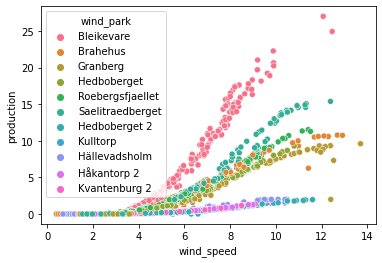

In [ ]:
sns.scatterplot(x='wind_speed', y='production', hue='wind_park', data=wind_park_data);

# Merging dataframes

In [ ]:
rocky_merge = rockyll_trade_id[['pro_ID', 'trade_Date', 'trade_ID', 'trade_Price']]
rocky_merge['trade_ID'] = rocky_merge['trade_ID'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rocky_merge.head()

,pro_ID,trade_Date,trade_ID,trade_Price
0,1620627,11.08.2020 09:50:58,4837585,"23,8"
1,1053282,11.08.2020 10:06:17,4837586,"23,8"
2,2023205,12.08.2020 09:37:34,4837982,-1
3,2301718,12.08.2020 09:41:10,4837983,"-2,3"
4,2301718,12.08.2020 09:47:02,4837984,"-2,3"


In [ ]:
wind_park_data.head()

,wind_park,production,wind_speed,temperature,date
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437


In [ ]:
index_mgmt_trades.head()

,trade_ID,price,product,volume
0,4842452,22.25,ENOYR-21,0.07937
1,4842453,24.45,ENOYR-22,0.19374
2,4842454,25.65,ENOYR-23,0.19605
3,4842455,25.65,ENOYR-23,0.13253
4,4842456,27.63,ENOYR-24,0.00264


In [ ]:
rocky_merge['trade_ID']

0     4837585
1     4837586
2     4837982
3     4837983
4     4837984
       ...   
80    4874763
81    4874764
82    4875492
83    4875655
84    4878774
Name: trade_ID, Length: 85, dtype: int64

## Merge RockyII and IndexMgmt on Trade_ID

In [ ]:
# Note: Check if error persists with df_100 for rockyII

df2 = pd.merge(index_mgmt_trades, rocky_merge, on='trade_ID')

In [ ]:
df2

,trade_ID,price,product,volume,pro_ID,trade_Date,trade_Price


# Run anomaly models

## Wind Park Import 

In [ ]:
wind_park_data.head()

,wind_park,production,wind_speed,temperature,date
0,Bleikevare,0.000,1.607143,17.142857,2020-08-01 01:45:52.437
1,Brahehus,0.000,3.395121,18.056423,2020-08-01 01:45:52.437
2,Granberg,0.000,2.360000,17.600000,2020-08-01 01:45:52.437
3,Hedboberget,0.321,3.740000,18.800000,2020-08-01 01:45:52.437
4,Roebergsfjaellet,0.000,2.125000,18.375000,2020-08-01 01:45:52.437


In [ ]:
# Checking if the data is balanced
wind_park_data['wind_park'].value_counts(normalize=True)

Brahehus            0.090909
Hedboberget         0.090909
Bleikevare          0.090909
Granberg            0.090909
Hedboberget 2       0.090909
Kulltorp            0.090909
Hällevadsholm       0.090909
Roebergsfjaellet    0.090909
Saelitraedberget    0.090909
Kvantenburg 2       0.090909
Håkantorp 2         0.090909
Name: wind_park, dtype: float64

### Import larger wind power import dataframe

In [ ]:
wind_power_import_100 = df_100[df_100['log_application'] == 'Wind Power Import']
wind_power_import_date_text = wind_power_import[['log_date', 'text_data']]

In [ ]:
series = wind_power_import_100[['log_date', 'text_data']].apply(wind_power_str_to_df, axis=1)
wind_park_data_100 = pd.concat(series.values.tolist(), ignore_index=True)

In [ ]:
wind_park_data_100['date'] = wind_park_data_100['date'].astype(str)

In [ ]:
# Preprocessing data
wind_park_data_100['date'] = wind_park_data_100['date'].astype(str)

wind_park_day = pd.DataFrame(columns=['day'])
for row in wind_park_data_100['date']:
    wind_park_day = wind_park_day.append({'day': row[0:10]}, ignore_index=True)
wind_park_merged = pd.concat([wind_park_data_100, wind_park_day], axis=1)

In [ ]:
wind_park_data_day = wind_park_merged

In [ ]:
import matplotlib.pyplot as plt
# import seaborn

# import mylib

# a4_dims = (11.7, 8.27)
# df = mylib.load_data()
# fig, ax = pyplot.subplots(figsize=a4_dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)

In [ ]:
plt.rcParams['figure.dpi'] = 115

In [ ]:
sns.set(rc={'figure.figsize':(10,8.27)})

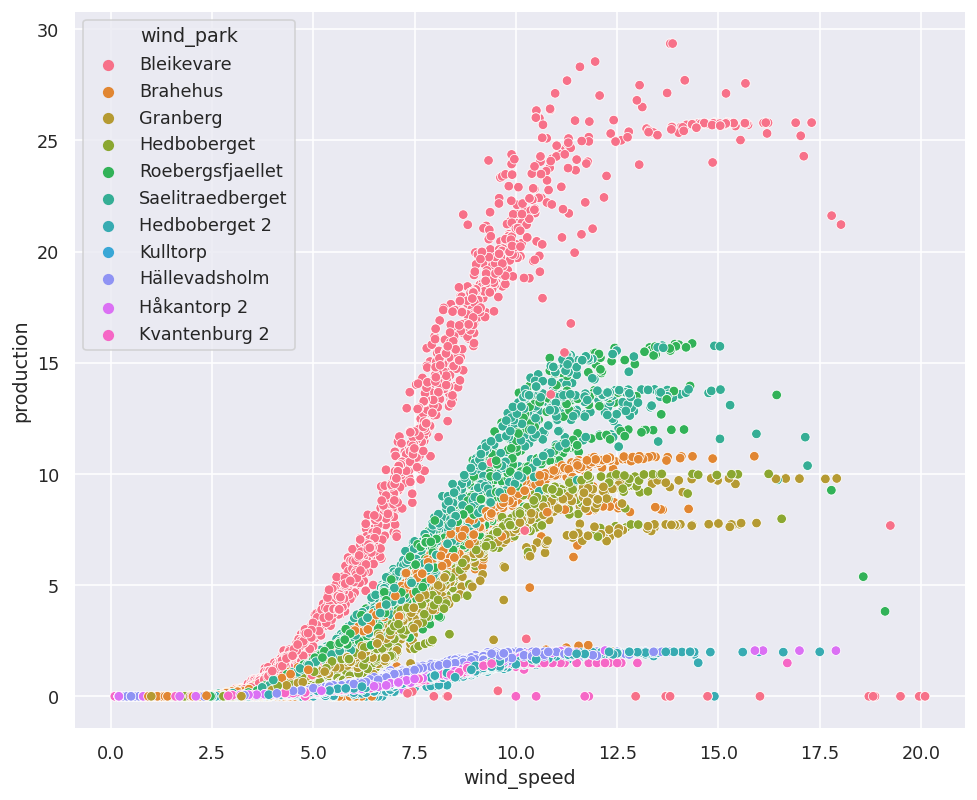

In [ ]:
wind_park_2 = sns.scatterplot(x='wind_speed', y='production', hue='wind_park', data=wind_park_data_100);

In [ ]:
# plt.savefig(data/wind_park_2, dpi=200, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
rng = np.random.RandomState(42)

# Splitting wind_park_data into train and test sets
# X_train, X_test, = train_test_split(wind_park_data_100, test_size=0.33, random_state=42)

In [ ]:
clf = IsolationForest(random_state=rng, behaviour="new")

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    clf
)

# Fit on train
pipeline.fit(wind_park_data_100)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['wind_park', 'date'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('isolationforest',
                 IsolationForest(behaviour='new', bootstrap=False,
                                 contamination='auto', max_features=1.0,
                                 max_samples='auto', n_estimators=100,
                                 n_jobs=None,
                                 random_state=RandomState(MT19937) at 0x7F7F98C8B888,
                                 verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
# Isolation Forest on Production
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    clf
)

# Fit on train
pipeline.fit(wind_park_data_100[['production', 'wind_speed']])

# Score on val
# pipeline.predict(X_test)
y_pred_train_prod = pipeline.predict(wind_park_data_100[['production', 'wind_speed']])
y_pred_train_prod

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
wind_park_data_100_test = wind_park_data_100

In [ ]:
wind_park_anomalies_prod = pd.concat([wind_park_data_100_test, pd.Series(y_pred_train_prod)], axis=1)

In [ ]:
wind_park_anomalies_prod

,wind_park,production,wind_speed,temperature,date,0
0,Bleikevare,0.0000,1.607143,17.142857,2020-08-01 01:45:52.437,1
1,Brahehus,0.0000,3.395121,18.056423,2020-08-01 01:45:52.437,1
2,Granberg,0.0000,2.360000,17.600000,2020-08-01 01:45:52.437,1
3,Hedboberget,0.3210,3.740000,18.800000,2020-08-01 01:45:52.437,1
4,Roebergsfjaellet,0.0000,2.125000,18.375000,2020-08-01 01:45:52.437,1
...,...,...,...,...,...,...
23887,Hedboberget 2,1.1939,8.900000,3.000000,2020-11-10 04:40:42.450,1
23888,Kulltorp,NaN,NaN,NaN,2020-11-10 04:40:42.450,1
23889,Hällevadsholm,0.1320,4.100000,6.000000,2020-11-10 04:40:42.450,1
23890,Håkantorp 2,0.0000,1.700000,NaN,2020-11-10 04:40:42.450,1


In [ ]:
wind_park_anomalies_prod.columns = ['wind_park', 'production', 'wind_speed', 'temperature', 'date',
    'anomaly']
anomaly_prod=wind_park_anomalies_prod.loc[wind_park_anomalies_prod['anomaly']==-1]
anomaly_index=list(anomaly_prod.index)
print(anomaly_prod)

              wind_park  production  ...                     date  anomaly
8         Hällevadsholm      0.0000  ...  2020-08-01 01:45:52.437       -1
9           Håkantorp 2      0.0000  ...  2020-08-01 01:45:52.437       -1
19        Hällevadsholm      0.0000  ...  2020-08-01 01:50:48.030       -1
20          Håkantorp 2      0.0000  ...  2020-08-01 01:50:48.030       -1
30        Hällevadsholm      0.0000  ...  2020-08-01 01:55:47.693       -1
...                 ...         ...  ...                      ...      ...
23816          Brahehus      0.0000  ...  2020-11-08 10:50:42.280       -1
23826        Bleikevare      6.6119  ...  2020-11-08 17:50:44.323       -1
23848        Bleikevare      6.6783  ...  2020-11-08 18:10:44.990       -1
23859        Bleikevare     20.2215  ...  2020-11-09 06:00:42.640       -1
23886  Saelitraedberget      7.7824  ...  2020-11-10 04:40:42.450       -1

[4420 rows x 6 columns]


In [ ]:
# Merge y_pred anomaly data with wind park data
wind_park_anomalies = pd.concat([wind_park_data_100_test, pd.Series(y_pred_train_prod)], axis=1)

In [ ]:
# Add Anomalies onto DF
wind_park_anomalies = pd.concat([wind_park_data_100_test, pd.Series(y_pred_train_prod)], axis=1)

In [ ]:
wind_park_anomalies.columns

Index(['wind_park', 'production', 'wind_speed', 'temperature', 'date', 0], dtype='object')

In [ ]:
wind_park_anomalies.columns = ['wind_park', 'production', 'wind_speed', 'temperature', 'date',
       'anomaly']

In [ ]:
anomaly=wind_park_anomalies.loc[wind_park_anomalies['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

              wind_park  production  ...                     date  anomaly
8         Hällevadsholm      0.0000  ...  2020-08-01 01:45:52.437       -1
9           Håkantorp 2      0.0000  ...  2020-08-01 01:45:52.437       -1
19        Hällevadsholm      0.0000  ...  2020-08-01 01:50:48.030       -1
20          Håkantorp 2      0.0000  ...  2020-08-01 01:50:48.030       -1
30        Hällevadsholm      0.0000  ...  2020-08-01 01:55:47.693       -1
...                 ...         ...  ...                      ...      ...
23816          Brahehus      0.0000  ...  2020-11-08 10:50:42.280       -1
23826        Bleikevare      6.6119  ...  2020-11-08 17:50:44.323       -1
23848        Bleikevare      6.6783  ...  2020-11-08 18:10:44.990       -1
23859        Bleikevare     20.2215  ...  2020-11-09 06:00:42.640       -1
23886  Saelitraedberget      7.7824  ...  2020-11-10 04:40:42.450       -1

[4420 rows x 6 columns]


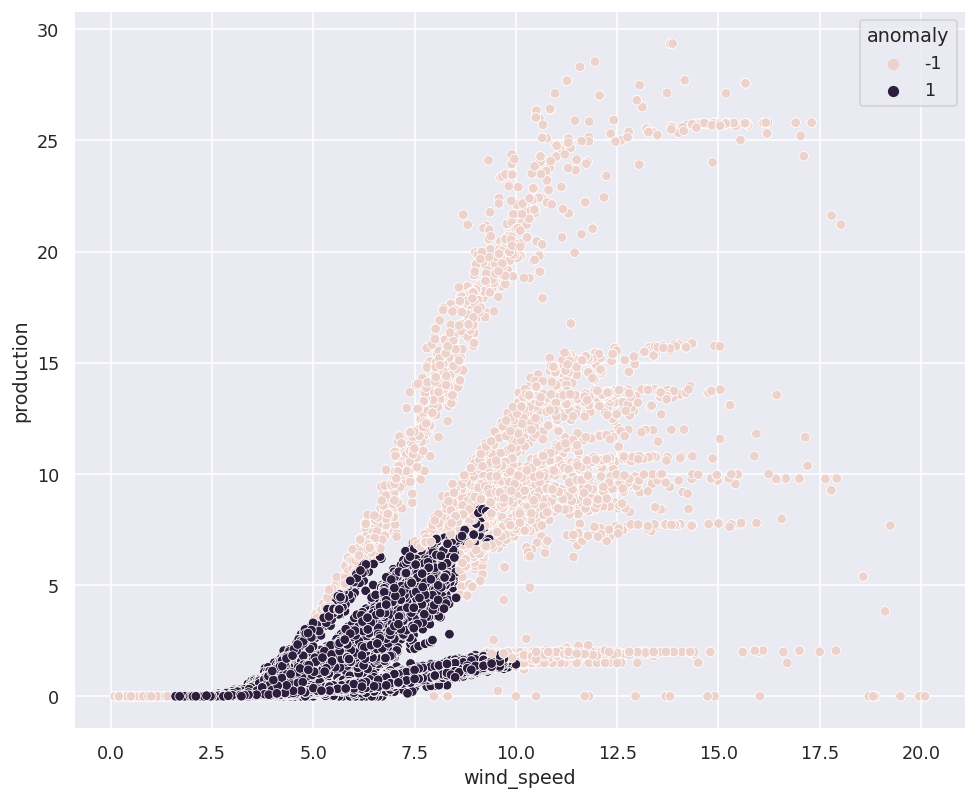

In [ ]:
# Har ikke inkludert 'score', men dvs at alle anomalies er rundt 80% 'annerledes' enn resten av dataen
# Det er kanskje en forklaring på hvorfor den plukker opp alt for mange outliers her.
sns.scatterplot(x='wind_speed', y='production', hue='anomaly', data=wind_park_anomalies);

# Using wind mill data to predict production

## Decision Tree Regressor, preprocessing

In [ ]:
# Reduce float columns to 2 significant figures
wind_park_data_day = wind_park_data_day.round(2)

In [ ]:
# Production data is highly stratified. Model must account for this.
wind_park_data_day['production'].value_counts(normalize=True)

0.00     0.090715
0.02     0.010793
0.01     0.009461
0.05     0.009033
0.04     0.008606
           ...   
11.33    0.000048
15.21    0.000048
17.40    0.000048
17.43    0.000048
13.51    0.000048
Name: production, Length: 1702, dtype: float64

In [ ]:
# Kulltorp always NaN
Kulltorp = wind_park_data_day[wind_park_data_day['wind_park'] == 'Kulltorp']

In [ ]:
Kulltorp.head()

,wind_park,production,wind_speed,temperature,date,day
7,Kulltorp,NaN,NaN,NaN,2020-08-01 01:45:52.437,2020-08-01
18,Kulltorp,NaN,NaN,NaN,2020-08-01 01:50:48.030,2020-08-01
29,Kulltorp,NaN,NaN,NaN,2020-08-01 01:55:47.693,2020-08-01
40,Kulltorp,NaN,NaN,NaN,2020-08-01 02:00:55.893,2020-08-01
51,Kulltorp,NaN,NaN,NaN,2020-08-02 10:30:50.287,2020-08-02


In [ ]:
Kulltorp.tail()

,wind_park,production,wind_speed,temperature,date,day
23844,Kulltorp,NaN,NaN,NaN,2020-11-08 17:55:49.930,2020-11-08
23855,Kulltorp,NaN,NaN,NaN,2020-11-08 18:10:44.990,2020-11-08
23866,Kulltorp,NaN,NaN,NaN,2020-11-09 06:00:42.640,2020-11-09
23877,Kulltorp,NaN,NaN,NaN,2020-11-09 23:20:45.993,2020-11-09
23888,Kulltorp,NaN,NaN,NaN,2020-11-10 04:40:42.450,2020-11-10


In [ ]:
# Håkantorp 2 & Kvantenburg 2 do not have temperature measurements
# Kulltorp seems to only return NaN values

wind_park_data_day.isnull().sum()

wind_park         0
production     2859
wind_speed     2859
temperature    7160
date              0
day               0
dtype: int64

In [ ]:
# Removing NaN values for train_test_split
wind_park_data_day = wind_park_data_day.dropna()

In [ ]:
wind_park_data_day.isnull().sum()

wind_park      0
production     0
wind_speed     0
temperature    0
date           0
day            0
dtype: int64

In [ ]:
wind_park_data_day.shape

(16732, 6)

In [ ]:
# stratify=wind_park_data['production'] Error: The least populated class in y has only 1 member, which is too few.
# Se etter annen måte å balansere target.

train, val = train_test_split(wind_park_data_day, train_size=.8, test_size = .2, random_state = 42)

In [ ]:
# Set target
target = 'production'

# get a dataframe with all train columns - target & wind_speed
# wind_speed accounts for almost all predictive power
train_features = train.drop(columns=[target, 'wind_speed'])

# Get a list of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists
features = numeric_features + categorical_features
print(features)

['temperature', 'wind_park']


In [ ]:
# Arrange the data into X features matrix and y target vector

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
# X_test = test[features]

In [ ]:
# Get baseline
wind_park_data_day['production'].median()

1.47

In [ ]:
wind_park_data_day['production'].mean()

3.5278030121921784

In [ ]:
# Looks like a good problem for a Regression Decision Tree

from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    # StandardScaler(),
    DecisionTreeRegressor(random_state = 42, max_depth=20, min_samples_leaf=6, min_samples_split=15)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.43626820403260025


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


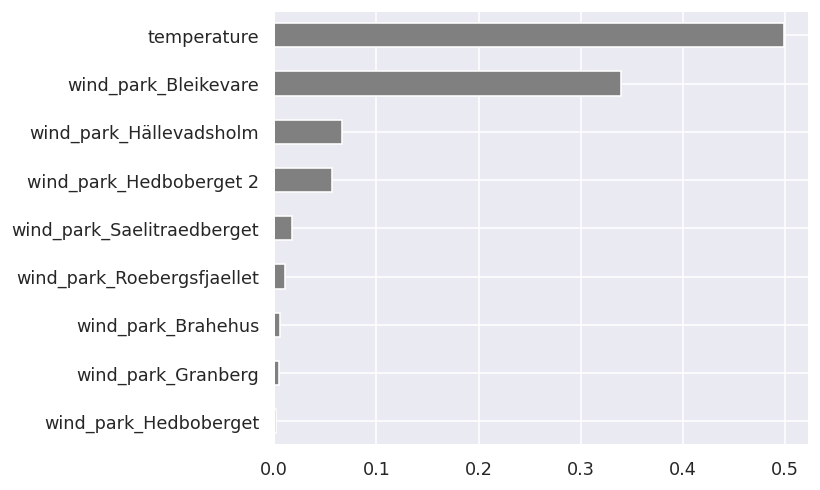

In [ ]:
model = pipeline.named_steps['decisiontreeregressor']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(6,5))
importances.sort_values() .plot.barh(color='grey');

# Temp & Bleikevare highly predictive.
# Days are fairly leaky

# Planlegging

In [ ]:
1. Gå gjennom alt av data og finner ut hva det betyr
2. Clean data
3. Sett data i rekkefølge (tid) - Se sammenheng mellom datapunktene.
4. Planlegg: Hvilke muligheter for modellering har vi?
5. Velg appropriate mulighet
6. Wrangle data
7. kjør modell

SyntaxError: ignored

In [ ]:
Er det noe poeng i å lage graphs?
- Tror ikke det er noe vits i før jeg har laget dataframes av EF+/Rocky, Wind Power Export
-- Så kan vi graphe de.

- Er det interessant å graphe tidsdata?
- Fra initial analyse ser det ut som columns som:
-- log_application, log_text, log_id, lvl_id, log_attlen
--- Er ikke interessant å graphe.

In [ ]:
Tanker:
Ser ut som alle RockyII trades er logget i IndexMgmt og executed i EF+.
Derfor: sjekk med et større dataset om å scrape data fra EF+ gir nok info fra RockyII trades

Vi kan dermed bruke:
+ Wind Power Import tallene fra Sverige
+ EF+ tallene
+ Nord Pool tall fra eksternt dataset
= til en neural network modell som predikerer pris for neste dag.

Hva trenger jeg for å få det til?
- Sjekk om nødvendig info er i EF+
-- Gjør analyse av 100k row dataset.
--- Sjekk om alle RockyII trades er i EF+
-- Hvis ikke: scrape data fra RockyII
--- Put i dataframe, concat RockyII_DF med DF
- Scrape Wind Power Import tall
-- Split på "Sender til Powel", så ha 3 columns, for Production, temp, wind speed.
- Import Nord Pool pris dataset
-- Merge på date
-- Klar til modell?